In [2]:
####################### Library for web crawling #########################
import os
import re
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import StaleElementReferenceException
from bs4 import BeautifulSoup

####################### Library for saving data ##########################
import pandas as pd

####################### Library for Extracting keywords and drawing wordclouds ##########################
from konlpy.tag import Okt, Mecab
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [1]:
##################### variables related selenium ##########################
options = webdriver.ChromeOptions()
#options.add_argument('headless') # 크롬이 실행되지 않고 background로 작업할 수 있게끔 함
options.add_argument('lang=ko_KR')
chromedriver_path = "./chromedriver" # user's chromedriver path
driver = webdriver.Chrome(os.path.join(os.getcwd(), chromedriver_path), options=options)  # chromedriver 열기
wait = WebDriverWait(driver, 10)
'''
--미완성, 댓글 페이지까지는 직접 들어가야 함--
원하는 웹툰(예 https://webtoon.kakao.com/content/아비무쌍/1395) 들어감
댓글 페이지까지 직접 들어가고, 이후 코드 실행
'''

'\n--미완성, 댓글 페이지까지는 직접 들어가야 함--\n원하는 웹툰(예 https://webtoon.kakao.com/content/아비무쌍/1395) 들어감\n댓글 페이지까지 직접 들어가고, 이후 코드 실행\n'

['지 인권 주장하는 개썅놈들이 있는데 지들은 피해자 인권 침해 다해놓고선 저 지랄 함. 난 아직도 범죄자 인권 보호라는 명목으로 함부로 때리지 못하고 법도 솜방망이로 해 놓는게 더 웃김.', '4화', 1484, 21]
['저여자 뭔가 마음에 안드네요. 혼자 다 아는척만 하고 똑바로 얘기도 안하고.. 이유가 있는지 없는지 모르겠지만 저런식으로 행동하면 옆사람은 충분히 빡치죠~~', '7화', 1304, 161]
['저렇게 자기 능력을 다 까발리고 유명해져도 안전한가..ㅋㅋㅋㅋㅋ 싸이코메트리 소재로 저렇게 공개적인 케릭터는 처음같은데요.', '1화', 1197, 31]
['머해 동백와 어서 와서 박근혜 최순실 사건좀 시원하게 얘기해다오', '2화', 1148, 60]
['동백이 기억을 읽는 동시에 진재규도 능력을 썼군요... 무슨 기억을 읽었는지 체크하고, 그 읽힌 기억들을 바로 제거... 그래서 동백이 읽은 기억 중 남은 건 "진재규가 사건현장에 존재했다"는 것뿐... 실제로는 그곳에서 살인도 저지르고 다했겠지만, 그런 장면들은 진재규가 능력으로 싹 지워버렸고... 선글라스 준 걸 기억 못하는 거나 아이한테 신발을 긁힌 걸 떠올리지 못하는 건 그 여파이려나...', '17화', 1108, 44]
['저 여자도 뭔가있는듯;; 정상은 아닌듯;;', '7화', 938, 57]
['소름...... 시나리오 판권팔아도 되겠다', '30화 (시즌1 마지막회)', 915, 19]
['진재규가  98년도와  2015년에  연쇄 살인을 자행한 범인이라면,   피해자 유형이 변한 원인은  그가 부모  또는 가장이 되었다는 것입니다   벌을 받아 마땅한 인간들이 버젓이 활개치고 사는 것을 벌주기 위해 살인을 했다면  당사자의 숨을 끊는 것보다  사랑하는 그들의 가족,  예쁘디 예쁜  자식을 죽임으로써 그들에게 가장 가혹한 벌  ,상실의 괴로움을 안겨줘서   산 채로 지옥을 맛보게 하려는   의도인 것이죠 단지 자신 또한  범인으로 체포 되었을때   남게 되는 가족의 아픔을 어떻

['아직 실마리가 부족하지만  유추 해볼수 있는것들이 있습니다. 첫째,  ... 기억이 안나', '38화', 395, 37]
['갑자기 지난화부터 동백이가 내가알고 좋아하던 울 주인공 동백같지 않은  이낯설음ㅠ  동백이 너무 안타깝고 속상네요.  분명 살인을 했지만  미워지지도 않고ᆢ', '54화', 389, 7]
['여자 너무 민폐 ㅜㅜ 당당한척 시리븐별 빠른척 다하더니...', '13화', 384, 57]
['이제 능력자들의 싸움인가 1라운드에서 동백이 지고 명성을 잃겠지', '3화', 384, 25]
['아 저기, 여기 먼지를 떨어뜨리셨네요. 주워드리려고 몸을 굽혔습니다. (괜찮아, 자연스러웠어!)', '19화', 380, 21]
['아몰랑~ 안들려안들려~~~~~ 우부부부부~~  ))ㅡ.ㅡ((', '57화', 379, 186]
[' 뛰는 놈 위에 나는 놈이네요  상대의 기억도   전부가 아닌  필요한 일정부분을   지우는 능력이라니 ,아니  자신의 기억을 감추고   편집하는 능력까지...   완전 범죄의 초능력자네요  그가 약해졌을 때 잡아본들  경찰 검찰 법정 각 단계에서 본인의 뜻대로 ,아니 구속도 불가능하겠네요   방법은  현장 사살밖에 없는데 어떻게 엮을까요? ', '17화', 378, 26]
['진모리?', '12화', 373, 16]
['헐.. 끝난줄알앗는데..반전이...  세훈이가 조력자아닐까요?? 밥값은해야지라는 대사가 신경쓰이네요', '55화', 367, 26]
['결국 동백이구나.  .차라리 진재규는 나쁜넘을 직접 죽였는데.  .동백은 나쁜넘의 소중한 사람. . 아까 그 여고생만 봐도 무고한 살해를 했다.  물론 차장과 재벌회장 등 직위가 높은 넘들까지 동백이가 해치우면 사이다겠지만. .무고한 사람들을 죽인 것에는 좀 찝찝하다. 동백이 팬이였는데. .ㅠ', '53화', 367, 27]
['미래의 동백 아내일듯 100퍼', '5화', 363, 46]
['동백이가 맞짱상대 제대로 만난것 같네요. 계속 구미가  땡기는데...', '6화', 3

['작가님이 큰 떡밥 투척함.....위에서 보면 알수있듯이 은곤이 거의 20년전에 보청기를 착용하기 시작했을때쯤 주호의 나이는 대략 초등학교 2~4학년..지금 주호(진범?)의 나이는 대략 28~30살...휴제 특별편에 나온 현재 세훈의 나이는 28살....동백이는 2011년 대학교 졸업(2화 참조)...1998년에 살인 사건 이후 20년이 지난 지금은 2018년이므로 동백의 나이는 군대를 갔으면 대략 33~35살......즉 진범은 동백이 보다 세훈이 유력함.. ', '45화', 236, 23]
['아... 숨쉬자... 후....... 본 내용중 가장 숨막히는 전개', '12화', 235, 11]
['기억을 읽는사람 VS 기억을 지우는사람', '3화', 235, 20]
['옆집에서 고구마 잔뜩 먹었는데 시원하게 사이다 드링킹 하는 기분~~~~잘보겠습니다~~~', '1화', 234, 30]
['동백이와 세훈이가 모두 능력자인것 같네요 기억왜곡 조작은 세훈이 능력인것 같아요 총쏴서 동백이는 병원으로 빼내고 남은사람들 기억 조작하는것은 세훈이..', '56화', 232, 28]
['진재규는 어찌보면 본인을 잡아 주길 무척 바라고 있네요  아마 이번에 예정된 범행을 성공하고   현장에서  죽기를 바랄 수도 있겠네요   그가 죽인 그들처럼   그 또한 범죄자니까요  그 여중생 죽일때 미안하다고 한 것도  ,  본인의 예쁜 딸에게도  계속 죄를 짓는 아빠가 될 수는 없을 테니까요 최근까지의  범행은  일부러 자신을 찾아주길 바라는 의도로  저질렀으나  피해자의 부모들이 하지 못했고    선글라스를 돌려주러 오면서 동백에게 마지막 범행의 힌트를 준게 아닐까 유추해 봅니다  살인도 cctv가 있는 곳에서 저지를 듯..', '18화', 232, 30]
['베댓 쓰신분 잘못 이해하신게 있네요... 범인이 후배를 만나서 다른데로 보낸게 아닙니다. 대화내용을 보시면 후배는 아파트 관리실에 도착해 있음에도 불구하고 자신이 왜 그곳에 가 있는지는 기억을 못하고 사무실로 복귀하겠다고 말

['미친 눈마주침 윙크날려주기좋은타이밍 ', '19화', 153, 23]
['안녕하세요 메모리스트작가 재후입니다. 댓글에 은곤의 대사(세번째라고 언급한 부분)를 수정했습니다. 작품 감상하시는데 오타로 혼란을 드렸네요. 독자분들께 죄송합니다ㅠ ', '52화', 151, 8]
['근데 동백이가 크게 소리질러서 저사람들 들킨거 아닌가요? 치지직 거릴정도로 크게 말해서 사람 귀청떨어지게해놓고 평범하게 있으라니ㅋㅋ', '19화', 150, 11]
['동백 카운터 등장이군', '5화', 149, 18]
['나만 저 선미씨 싫은건가 ㅜㅜㅜ', '54화', 148, 35]
['메모리스트른 보면 느끼는것들은...  아 내가 진짜 머리가 나쁘다는거ㅠ  윤곽도 못 잡고 있으니..ㅠ  비밀싀숲은 유추가 됐었는데ㅋ', '38화', 146, 16]
['동백이일리가 없잖아 동백이가 저기에 왜 있어', '51화', 145, 16]
['주호가 커터칼을 들고 있는 손은 왼손,,,,,동백이 총을 사용하는 손은 오른손(13화 참조)......15화 썸네일을 보면 세훈은 왼손 그리고 휴대폰  사용하는 장면에서 왼손 사용(4화 참조)', '47화', 145, 5]
['진짜 이렇게 몰입도쩌는 만화는 오랜만이다... 재밌고 시간떼우기좋은만화들 많이봐왔지만.. 예전 강풀님 최고작품들 볼때 보던거 못끊고 완결까지봤던기억이있는데 그때 그느낌임. 영화화될 가능성 100프로.  제발 망치지만 말았으면 좋겠다.', '10화', 145, 15]
['동백이가 살인을 저지르게 된 계기가 특별편에 잘 나와있네요', '특별편 5화', 144, 10]
['얼마전에 끝난 써클이라는 드라마가 생각납니다. 거기서 기억차단하지말고 기억하면서 책임지라는 말이 나왔었는데, 여기서는 안좋은일을 어느정도 잊을 수 있다는 사실에 감사하라고.. 기억과 관련해서 많은 생각을 하게 하네요', '32화', 144, 8]
['아......너무재밌어서 결제했는데 매주 결제하게될듯 ㅜㅜ', '7화', 143, 17]
['첫번째는 오른손잡이니 가짜고, 

[" 비슷한 만화로 데스노트가 생각나네요. 악행을 하는 주인공, 하지만 소년지에서의 연재라는 특성상 라이토의 파멸로 끝이 났었죠  이 만화도 동백이라는 매력적인 인물을 통해 선과 악 사이의 딜레마를 고민해 볼 수 있었다고 생각합니다. 평소의 이야기의 결말인, '그래도 악행을 저지른 자는 권선징악을 당한다.' 라는 엔딩이 아니어서 신선하긴 하지만 뭔가 허전하긴 하네요   만약 2부 3부가 나오게 된다면, 다른 초능력을 가진 제2의 인물이 나와서 서로의 선악대결을 하는 구도로 가면 어떨까 하는 생각도 들었습니다. 좋은 작품 감사합니다!", '58화-마지막 화', 95, 20]
['그냥 다른건 됫고 동백아 고생 많앗다 멋있느라', '57화', 95, 5]
['핸드폰사진 형사들 단체사진같은데 어디서나왔는지..못찾겠어요. 누군가는 찾겠지...', '50화', 94, 7]
['공범이 있는거 같은데 선미씨는 기억을 잊을까봐 진재규 안따라갈거같네요 공범도 잡아야하니', '27화', 94, 8]
['와 정말 결과가 뭐이따구냐. 십수년 전, 동백 주위 사람들이 기득권자의 부당한 수단으로 박살났다면, 이번엔 선미의 부당한 수단에 동백이 무너지네. 정말 많이 찝찝한 전개입니다. 선미가 처음부터 냉소적인 캐릭터였다면, 하다못해 선미와 동백이 복수와 수사과정으로 점점 미쳐가는 전개였으면 이해하고 재밌게 봤을 겁니다. 하지만 선미가 동백을 훈계하면서 정작 본인은 무고한 이의 목숨을 이용해서 동백을 공격합니다. 급작스럽게 드러나는 선미의 이 위선적인 모습에 정말 소나기를 맞은 거 마냥 찝찝합니다.', '54화', 93, 15]
['더없이 소중한 사람이 눈앞에서 죽는다라는건 반장을 얘기하는거 같은데 동백인거같기도하고 세훈인거 같기도 하고 누가됬든 안 이상할듯', '52화', 93, 0]
['소오오름... 아... 작가님... 어서 ㅜ ㅜ 담편 주세여 ..', '40화', 93, 4]
['조건이하나잇어... 다음화를 결재하도록..', '33화', 93, 18]
['34화에서 범인이 진재규와 

['사냥이 끝난  사냥개는 죽이는 법이지....심배동으로 보내서 저 놈을 죽이고  지금까지의 연쇄살인범이 체포과정에서 살해됬다라고 발표하면 끝~~~...', '44화', 65, 4]
['도망가라는말은 기억지운다는말이니까 빨리 튀어야지 굳이 얼굴 보겠다고..', '13화', 65, 5]
['만화가 중간에 끊겼는데요...모바일로봐서 그런건가요?', '16화', 65, 22]
['보는 내내 시그널을 떠올리게히는듯한 긴장감있는 스토리전개..작가님 감사합니다♡', '9화', 65, 7]
['걸어가며 휘파람으로 주변 사람들 기억읽다가 나쁜짓 한 놈 발견한거네요~ ', '58화-마지막 화', 63, 5]
['법보단 주먹이 정의일때가 많음..유전무죄 무전유죄  돈으로 법을 피해가는 악귀들은 잔인하게 응분의 댓가를 받아야함.', '25화', 63, 2]
['작가님 진재규 영구 미제로 가죠 16명이 집단 성폭행을 함??? 16명 일가족 다 찢어죽일 수 있게 해주세요 제발', '23화', 63, 8]
['저사람이범인인건가요', '17화', 63, 8]
['범인등장하는 장면에서 소오름..', '11화', 63, 6]
['일단 너무 이쁘다 ', '5화', 63, 15]
['45화를 보면 주호가 어떻게 이곳에 오게 됐는지 알수 있네요. 경찰 차장이 회장에게 은곤이를 처리할거라는다걸 보고 할때 그 자리에 있던 주호가 들었던 거네요. 그리고  usb가 왜 노트북에 연결되어있지않고 서류철에 있던것도 설명이 되네요. ', '51화', 62, 5]
['구도나 연출이 영화보는느낌!!', '14화', 62, 9]
['와 동백 캐릭터 매력봐ㅋㅋㅋㅋㅋㅋ 헤어날수가 없다', '2화', 62, 8]
['이제 범인이 당당하게 나오네ㅋ', '26화', 61, 7]
['동백이가 범인이 된 순간부터 뭔가 멍해진다..ㅠ_ㅠ', '54화', 60, 0]
['재미있는건 맞는데 너무 끌어서 예전 내용이 기억이안남 ㅋㅋㅋ', '43화', 60, 3]
['동백이는 유독 성범죄에 분노를 많이했었죠', '40화', 60, 5

['의외로 가까운곳에 범인이 있을지동.. 재밌게봤습니당', '8화', 43, 13]
['아픕니다. 마음이...', '48화', 42, 0]
['뭐야 ㅠㅠ  아무 내용도 없잖아요!! 아 고구마아~< ', '37화', 42, 23]
['여자 멋있어 ', '6화', 42, 25]
['토요일에 볼게 또 생겼네', '1화', 42, 7]
['설마 동백형사는 아니겠죠', '50화', 41, 3]
['이거 왠지 운전석에 앉은 세훈인가 하는 양반이 범인인거같은데... 10화 중간즈음 보면 동백한테 전화 건 세훈인가가 했던 말이 의심스러우면서도 뭔가 힌트를 준거같음.  AA아파트 관리사무실 부터 여기가 ㅇㄷ? 하자마자 대빵 형사가 범인이 아직 아파트 동 에서 벗어나질 않았다 라는 말을하고..  프로파일러가 범인 찾다가 마주친 인상착의의 남자는 공범인 진재규를 미리 보내놓고 미끼로 써먹으면서 자신은 용의 선상에서 완벽하게 벗어난거 같은 느낌이 듦.', '34화', 41, 9]
['으어엉ᆞ어 쩔어 힘내세용 밥두공기드세용ㅠ', '24화', 41, 3]
['진짜 최고네....', '20화', 41, 16]
['캐릭터가 살아서 이야기를 풀어가지 못하고  작가님이 뭔가 답답하게 질질 끌다보니  재미있던 소재와 캐릭터도 제 역할을 못하고  답답하게만 느껴집니다...', '15화', 41, 116]
['미리보기 독자만을 위한 후기가 따로 있었다니..! 작가님의 작은 배려에 미리보기의 또다른 감동이~^^ 다음에서 신작 투표할 때 메모리스트를 선택했는데 최종당선작에서 떨어진 것 보고 아쉽다, 왜지? 했던 기억이 나는데..맞죠?^^;; 그뒤 연재가 돼서 반가웠던 기억, 읽음서 중반쯤은 뭔가 터질듯한데 안터지고 이해 안가는 부분도 있어 한동안 안보다 몰아봤던 기억도 나고ㅋ 글다 검인 윤곽나오면서 오금저렸던, 새벽에 보다 무서워 등뒤를 돌아봤던 기억들^^;;정주행만 3번은 한듯~ 끝이라니 아쉽지만 담 작품 기대로 달래봅니다! 수고하셨어요~', '58화-마지막 화', 40, 1]
['지린다 영화로 ㄱ

['진짜 욕밖에 안나온다 개말종놈들', '48화', 31, 0]
['미리보기 많이 올러주세염. .돈쓸작정했으니까요~~잼있어요~!!', '34화', 31, 8]
['미리보가가 필요하다~!!ㅋ', '32화', 31, 11]
['꽤 많은 분들의 닉을 외우시는 작가님도 메모리스트이시네요"+_+', '30화 (시즌1 마지막회)', 31, 5]
['일단 기억삭제 의 능력이 좀 구체적으로 나온거같네요 자신이 원하는 기억만 골라서 삭제하는게 아닌 시간대로 삭제 시키는거같습니다 몇시몇분 부터 몇시몇분 까지의 기억을 전체로 삭제시키는거같아요. 세부적으로 원하는 기억만 골라서 삭제 시키는건 불가능한거같습니다. 예를들어, A가 7시~8시 까지 런닝머신을 뛰면서 전화통화를 했다고 했을때 A의 전화통화의 기억 을 지우려고 한다면 어쩔수없이 런닝머신 을 뛴 기억까지 다 사라진다는 것 즉, 자신에게 유리하게끔 기억을 지우면서 기억조작 같은건 할수없는거같음', '17화', 31, 9]
['드라마 4화보고 너무 궁금해서 결제길만 걸었는데 정말 재미있어서 후회없는 지름이었어요^^ 감사합니다. 살인이 정당화될수는 없지만 가끔 저렇게 초능력자가 나타나 대신 심판을 내려줬으면 싶기는 해요.. ', '특별편 5화', 30, 0]
['시즌2 였으면 ㅜㅜ..', '특별편 3화', 30, 0]
['아직 기억 있는 사람 한 명 더 있지 않나. 기자님', '57화', 30, 0]
['반전이 있을 것 같네요.. 세훈이가 수상함', '56화', 30, 1]
['동백이는 왜 일부러 총을 맞아준걸까...ㅠㅠ 충분히 안 맞을 능력이 있었을텐데 ', '55화', 30, 0]
['동백 아니지 않을까요 ..? 동백이면 막 뉴스에도 나고 인터뷰도 하고 엄청 유명하고 얼굴도 다 알려져 있는데 아저씨가 굳이 다른 사진을 찾아서 보여주려고 하지 않았을거같아요 ....!', '50화', 30, 4]
['8화에서 범인이 아파트에서 운동하는 모습 나옴. . 진재규가. . 잡힐 때 대사. .짜증나는군. 기억을 읽는놈들은.  .게다가 초반

['후덜덜', '33화', 20, 4]
['오셔따!!!!!!!!오셔따!!!!!!!!!!오셔따!!!!!!!', '시즌2 예고편', 20, 7]
['와 뭔가 그럴거같은느낌이 들었는데 진짜 갈았어..ㄷㄷ', '27화', 20, 1]
['영화화 되면 좋겠다..김과장에서 준호따라다니던 행동대장?아저씨 아시는 분?ㅋㅋ 그 분이 진재규랑 많이 닮았는데 그 분이 하시면 좋겠다', '26화', 20, 3]
['차장!!!!근데 진짜 현실은 더 쓰레기라는게 너무 슬프다ㅠㅠ', '23화', 20, 2]
['그냥 김재규 아까 눈마주쳐서 살짝 지린거같은데 지려서 서서 잠시동안 말리고 다시 움직인듯. 다시 수사는 미궁으로', '20화', 20, 7]
['뺑소니범에 의해 자식을 잃은 능력자의 짓인가. 판결을 했던 판사 변호했던 변호사 뺑소니범을 두둔했던 편집장 그를 못잡거나 풀어준 형사의 가족들을 죽이고 다니는거? 마지막 타겟은 뺑소니범 이거나 그의 가족들??', '15화', 20, 3]
['.....나중엔 범임 붙잡혀도 뭐라 할 분위기가 아닌거 아닌지.....ㅠㅠ', '15화', 20, 1]
['전 10.000원 드릴테니 원고좀..', '12화', 20, 5]
['할 주..주인공 죽지마 ㅠㅠㅠㅠㅠ', '12화', 20, 6]
['ㅎㄷㄷㄷ~~~ 근래 본 웹툰 중에 최고에요 반장님?  빵터짐 ㅋㅋ', '7화', 20, 2]
['어린 동백이, 그러니까 주호가 처음 초능력을 알고 마구잡이로 썼을 때 일이나 진재규를 처음 만나고 진재규와 둘이 있었던 일들도 외전으로 보고싶어요ㅠㅠ2부에서 중간중간 나오긴했지만 풀스토리를 알고싶은ㅠㅠㅠㅠ', '특별편 5화', 19, 2]
['결말을 알고 정주행하니 또 소름이네', '17화', 19, 0]
['쩝 결말이 조금 아쉽네요. 선미가 기억이 지워질 걸 대비해서 대책하나 마련하지 않았다는 것도 조금 의아하고요. 기자에게 자신의 위치를 알린 이상 언제고 기억이 지워질 수 있다는 사실을 염두에 두고 뭔가 액션을 취했을 거라고 생각했는데.. 보는 동안 재미있게 잘 

['아악.. 다음화가 필요해ㅜㅜ 결제의 늪에서 빠져나올수가 없다', '38화', 14, 7]
['영화로 안나오나요?', '35화', 14, 8]
['뭐지?', '31화', 14, 5]
['정말 재밌게 잘 봤습니다!!! 마지막회 미리보는 사람들까지 배려해주시다니.. 완전 감동!! 모든 캐쉬를 이 작품에 쏟았습니다ㅎㅎㅎ 멋진 작품 고맙습니다! 기다리겠습니다^^', '30화 (시즌1 마지막회)', 14, 6]
['컨트롤Z 로 기억을 지운다.', '21화', 14, 9]
['조병재라는데 왜 유병재가 떠오르지  중간에서 촵촵 유갈량..?', '22화', 14, 12]
['으호옹ㅇ엉어어엉ㅇ 넘 재미있어오', '16화', 14, 13]
['미치겠네 왜케 재밌죠 결제를 멈출 수가 없네', '12화', 14, 9]
['프로파일러가 과거 사건의 피해자의 유가족 아닐까요?', '8화', 14, 4]
['정말 영화보는느낌', '7화', 14, 6]
['쓰레기가 인권이 어딨어   쓰레기는 걍 소각해야지   이 좁은 땅덩어리에  쓰레기를 소각안하면 사람들이 못산다', '4화', 14, 0]
['결제대기자 1인추가요', '4화', 14, 5]
['나도저런초능력있음', '1화', 14, 10]
['이게 예고편이 함정이었네  기억읽는 능력이 마치 중,고 때부터 알아차린것처럼  생각하게', '예고편', 13, 7]
['아우씨 후드티확 벗겨불라  누구냐고! 디게 질질끄네', '51화', 13, 4]
['후드 진범, 완전 리얼 초능력자였어! 하이퍼 퀑이네‥ 그래도 컴비네이션 능력자는 아니겠지.ㅎㅎ', '51화', 13, 0]
['우리나하 법이 얼마나 쓰레기인지는 이번 폭행사건들을 통해 더 명확해졌지', '48화', 13, 0]
['최고다', '48화', 13, 0]
['주인공이 주호일가능성은?;;', '47화', 13, 0]
['저 뒤에남자 범인 아니다 백퍼...', '39화', 13, 0]
['지린다', '40화', 13, 0]
['이거 영화 안 만들면 대한민국 영화계의 큰 손실이다~~', '

['메모리스트는 걸작이였습니다. 후에 나올 작품도 끝내줄거 같습니다. 강형규 작가님 작품인 라모스카  단행본으로 처음 봤을때 이 작가는  대박나겠다 했는데 다음 오셔서 라스트 등등 초대박 치시더라구요!!! 믿고 대박 만화 기다리고 있겠습니다. 작가님 그간 고생하셨고 감사합니다!!', '58화-마지막 화', 9, 2]
['머리 터질듯  기억을 가져거니 몇명의 기억을 가져간걸까나', '57화', 9, 1]
['아니야. . . 이건  아니야. . ', '54화', 9, 1]
['이건 좀.... 아무리 반전을 노렸다고 해도 동백이는 그 자체로 어마어마하게 매력적인 캐릭터였기 때문에 이 사건 말고 다른 사건을 바탕으로 한 또다른 “메모리스트”의 큰 시즌을 기대할 만 했는데.. 그래서 끝내 동백이는 진범이 아닐거라고 생각했는데 이렇게 되버리는군요. 동백이는 이렇게 버려질 주인공이 아닌데.. 아깝네요. 히가시노 게이고의 탐정 갈릴레오처럼 여러 작품에 비중있게 출연할 만한 캐릭터라 생각했는데 작가님이 그렇게 큰 세계관으로 다룰 생각은 없으신듯. ㅠ', '53화', 9, 8]
['제가 시즌1  30화에서 동백이 범인 이라고 추측했던 이유는  진재규 선미 동백이 만났을때  동백이 진재규에 의해 기억을 잃은것처럼 행동을 했는데 나중에 진재규는 진범의 협박(?)으로   진범인 척 했었다는게 그 뒤에 나왔기 때문이었어요   제 추측이 맞아서 좀 재미있네요', '53화', 9, 2]
['은곤이아저씨가 죽었나봄... 처음 그 강의실 살인사건때보면 많은 사람들 기억 다 잃었는데 터치가 아니라 주변인건가.....', '55화', 9, 1]
['와 미쳤다 선미형사도 아니길 바랐겠지만 이런 상황까지 전부 예상해서 동백형사를 범인 리스트에 올려뒀었구나', '53화', 9, 1]
['성폭행범에 민감했다고 하던 떡밥이 있었음에도.... 동백은 아닐거란 생각을 하다니...나도 바보였군', '53화', 9, 1]
['씁쓸하다', '54화', 9, 0]
['얼굴은 안보이지만 목소리는 구분 할수 있잖아 지

['그 놈은 아닌거같고  또 이용당하는 놈이 나오는거 같은데  저 흑막들은 뭐지..', '32화', 7, 6]
['기억을 읽는 게 아니라 가져가는 건가요? 그래서 원래 주인은 머리가 텅 비게 되고요? 무섭네요..', '시즌2 예고편', 7, 1]
['벌써 오신거예요? 혹시 아이디어 뱅크세요?', '시즌2 예고편', 7, 4]
['우아!!!', '시즌2 예고편', 7, 5]
['짱이다 분량 내용 퀄리티 몰입도 그림체 심리묘사 반전까지 뭐하나 나무랄데 없는 고퀄웹툰. 타위 추종 불허. 네이버 개남들은 맨날 일진미화 웹툰이나 올리고 역시 더음이 최고', '30화 (시즌1 마지막회)', 7, 0]
['여자 개병신이네', '28화', 7, 9]
['힐불편하지 않냐고 하는데 힐가지고 악당 발차기하는것도 이쯤되면 클리셰..', '28화', 7, 6]
['와 설마 세훈이..? ', '30화 (시즌1 마지막회)', 7, 0]
['왜 주저앉은거죠...', '29화', 7, 1]
['저 후배 경찰 뭔가 수상하네요.. 혼자 안 다친 것도 그렇고', '26화', 7, 1]
['존나 민폐년 잘한다는듯이 ㅁ별 호들갑 다 떨더니.ㅉㅈ', '13화', 7, 3]
['프로파일러가 뭐저래 어거지쓰는듯한 느낌?뭔가 전문가다운게 안보임', '6화', 7, 2]
['다음화가 정말 궁금한데 재촉한다고 나올껀 아닌거 같고 하참', '28화', 7, 2]
['진재규애기가 자살한피해자 자식인가', '24화', 7, 1]
['차장놈이 덮을라고 공개수사한다고 했구만....미궁으로 빠지게끔! 저런놈 한둘이 목숨걸로 경찰직을 하시는 분들의 노고를 물거품으로 만들어버리는거지....에잇! 더러운 세상!!! ㅠㅠ', '23화', 7, 0]
['여자 발암...여자 캐릭터는 꼭 저렇게 몸에 붙고 몸이 드러나고 구두를 신고 그래야하나요? 작가의 진부한 연출력에 박수를 침 형사가 포멀한 옷 입은거부터가 해괴한 연출이지', '11화', 7, 9]
['요즘다음에명작이쏟아지내요ㅜㅜ불어라선결제바람', '25화', 7, 1]
['와.

['정주행으로 하룻밤에 달렸네요. 정말 재미있었습니다~!', '특별편 5화', 5, 1]
['이거 범인 동백이에요', '30화 (시즌1 마지막회)', 5, 9]
['진짜 댓글들 이해 안가네. 주인공한테 과하게 이입했네. 작가가 애초에 지금까지는 주인공을 지 초능력만 믿고 뭣모르고 나대는 천둥벌거숭이로 묘사해놨는데, 요새 먼치킨물만 봐서 그러나. 그냥 주인공이라면 감정이입해가지고 주인공이 정의고 진리고 답인 것처럼 생각해서 조금만 부딪히거나 반대하면 아주 고구마 발암으로 보고있네.   주인공 행태 : 남의 관할 침범하는 건 그렇다치고 그래놓고 최소한의 예의도 없는게 지 생각만 하고 남 배려 없음, 프로파일러로부터 전달받은 능력 쓸모 없을 거라는  ......(댓글은 300자까지만 노출됩니다)', '6화', 5, 1]
['아 넘 흥미진진', '특별편 4화', 5, 0]
['특별편 감사합니다ㅠㅠ 동백인 인생캐가됐어요ㅠㅠ', '특별편 5화', 5, 0]
['너무너무 재미있게봤어요 드라마때문에 흥미가 있어서 웹툰을 봤는데 이렇게 특별편까지 전부 보게되네요 ㅎㅎ 한편한편 소중하게 잘 읽었습니다 실제로도 정말 동백이같은형사가 있으면 너무 정말 좋을거같은데 ㅜㅜ', '특별편 5화', 5, 1]
['아.. 실수했다.. 그냥 기다리다 못해서 그냥 결제해버렸는데.. 또 기다려야 하는 줄 알았으면 그냥 계속 기다릴걸... 다음주까지 또 어떻게 기다리냐....', '특별편 2화', 5, 0]
['특별편 말고 시즌2로 해서 곅속 연재해주시면 안되요?', '특별편 2화', 5, 0]
['아니 왜 드라마랑 딴판이여', '6화', 5, 0]
['특별편 잘 보고갑니다', '특별편 1화', 5, 1]
['그냥 동백한테 열등감 터지는거네. 로또맞은 능력이니, 만행이니 단순 심술은 무슨... 열폭이지 그게 프로파일러란 사람이 본인 감정이 뭔지 모르나봄', '6화', 5, 6]
['네xx에 비질란테라는 웹툰에 주인공이 딱 전과자 죽이고 다니는데 직업은 경찰에다가', '8화', 5, 2]
['선미..

['쟤 동백임', '9화', 4, 8]
['미쳐써,.....', '특별편 2화', 4, 0]
['다시 시작하는건가요?! 예전일을 특별편으로 풀어주신건가.. 이해가 안가네요', '특별편 1화', 4, 0]
['헐뭐야 쟨 또 누구야', '특별편 1화', 4, 0]
['아직 다 안나왔구나..', '특별편 1화', 4, 0]
['엥? 갑자기?', '특별편 1화', 4, 2]
['드라마화 축하드려요!!!! 진짜 재밌게 봤었는데 유승호 이세영 배우 연기 기대됩니다!', '예고편', 4, 0]
['유승호가 주인공이다', '예고편', 4, 0]
['예전에 정주행했었는데 드라마화 되면서 다시 여시는건가봐요ㅠㅠ♡♡ 재밌어요!! 꾸준히 챙겨볼께요:) 드라마도 꼭 볼께요!', '예고편', 4, 0]
['처음 댓글 답니다. 진짜 대단한 명작입니다. 이 작품은 영화로 나와도 된다고 생각합니다.작가님 진짜 대단하네요. 어떻게 이런 스토리를 만들었는지.', '53화', 4, 0]
['솔직히 저런 막무가내 파워 지닌 현장범 잡으러 현장출동하는 씬에서는  여주도 바지에 단화신겨서 그려줬으면 좋겠다. 뭔 짧은 미니스커트에 하이힐이야? 그거 입고 달릴 수 있냐고?  그러니 남주한테 민폐끼치는 여주처럼 되버리잖아.ㅠ', '29화', 4, 1]
['닿는걸로 기억을 읽는다는것 자체가 거짓이었던건가요? 그건 그냥 트릭이었고 실체는 소리와 같은 자연스럽게 받아들이는 감각으로 기억을 읽고 조작하고 지운다는 건가요?? 장애인과 관련된 사건에서 물 먹은 이유가 궁금해요.. 위와같이 동백이의 능력이 사실은 소리를 통한 거기 때문인가요?!?!?! 지금까지 동백의 행동으로 보면 터치만으로 기억을 읽을수 있었고 사건해결도 읽는 능력 하나면 충분했는데 왜 물먹은건지 궁금해요!!!!', '57화', 4, 5]
['정주행 하니 안보이던게 보이네... 처음부터 모든게 떡밥이었어..', '5화', 4, 1]
['아...... 내용이넘좋아요 아.......와.. ............... 말이안나오네욬ㅋㅋㅋㅋㅋ 와와와와와와와

['잠깐, 진재규 잡히고 사건 잘 마무리 되면 이 웹툰도 마무리 되는 거야..?  ㅠㅠ', '28화', 4, 1]
['작가님 정말 정말 재미나게 보고 있습니다! 지난주에서야 이 웹툰을 알고 한숨에 정주행했어요. 마지막회 나오기까지 기다렸는데 이렇게 미리보기 분들을 위한 후기도 남겨주시고 감사합니다! 앞으로 시즌2도 기대 많이 많이 할게요. 그리고 열심히 결제할테니 미리보기 많이 만들어주세요ㅠㅠ❤️❤️❤️❤️', '30화 (시즌1 마지막회)', 4, 0]
['역시 진재규가 능력자는 아닌걸까', '28화', 4, 0]
['자신의 아이를 다른 사람에게 부탁한거같군요', '27화', 4, 0]
['진재규진짜!!!!!!!!!!!!!!!!!!!!!!!!', '26화', 4, 0]
['그냥 싸움 개잘하는거네.... 초능력은 쿨타임이 있을 뿐...', '26화', 4, 0]
['진재규는악이아니야', '26화', 4, 1]
['제발 죄지은 놈들은 벌좀 받자', '25화', 4, 0]
['솔지히 범인을 응원하고 싶다...', '25화', 4, 0]
['경찰들이 무슨 추풍낙엽이야;;;', '25화', 4, 6]
['아 여자 너무 짜증난다 작가가 너무 싫다 이야기를 꼭 이렇게 끌어가야 하나? 진부한 끌기...답답함. 세련되지 못한 전개 방식. 작가도 발전이 필요하다.', '13화', 4, 3]
['누구의 고통도 함부로 재단할 수 없다. 터무니 없는 이유, 고작 그런 이유  내 키와 당신의 키가 다르듯이 내 멘탈의 유약함이 당신과 다르다.  물론 그렇다고 범죄가 용서될 수 있는 일은 아니다 다만, 그 범죄가 일어나는 원인을 우리는 조금 줄일 수 있지 않을까  타인의 고통의 대한 예의  타인의 멘탈에 대한 배려와 이해 그게 먼저면 좋지 않을까', '15화', 4, 0]
['그 아이 성폭행 여학생의 아이 아닐까요....?', '23화', 4, 0]
['대머리는 좀더 읽기쉽다..마찰이없어서 신호가 잘 읽힌다', '23화', 4, 0]
['다음 내용 넘 궁금하네요...', '24화', 4,

["사실 이 만화의 제목이 사이코메트리가 아닌 '메모리스트'였다는 것 부터 작가님은 동백의 능력이 기억을 읽는것에서 끝나지 않는다는 것을 암시하고 있었던듯", '57화', 3, 2]
['다음주 진심 마지막회입니까? ㅠㅠ', '57화', 3, 3]
['동백이는 정말 능력자였네요. 진짜 반전 하나하나에 소름돋고, 마지막 결말까지 떡밥회수도 깔끔하고 너무 좋아요!! 좋은 작품 감사합니다♡', '58화-마지막 화', 3, 0]
['와.. 정말 무어라 할 말이 없을 정도네요.. 그동안 정말 감사했습니다! 다음 작품 기대할게요~~', '58화-마지막 화', 3, 0]
['보는 순간마다 캐릭터들이 사아있는듯한 느낌을받았어여 뭐랄까 영화를보는 느낌이랄까  캐릭터들의 심리묘사라든지 상태가 양화를보고 있는듯해서 너무 생생했어요 마직막까지 결말이 궁금했지만 막상 마지막을보니  아쉬웠어요 아..이제 끈나버렸구나하면서ㅜㅜ 결말까지 너무 재밌었습니다 새해볻많이받으세여^^', '58화-마지막 화', 3, 0]
['웹툰을 정말 좋아하는 한 사람으로써 가장 인상깊게 몇번이고 정독한 첫 작품이에요 작가님의 후기만 보아도 작품에 대한 애정이 어느정도인지 또 얼마나 많은 고심 끝에 작화를 하고 스토리를 짰는지 느낄 수가 있는 것 같네요 말씀도 너무 잘하시구!_! 작가님 덕분에 정말 좋은 웹툰 잘 봤어요 연재 기간동안 너무 고생 많으셨고 다음 작품들도 꼭 관심있게 챙겨볼게요! 새해 복 많이 받으세요🌹', '58화-마지막 화', 3, 0]
['작가님, 동전지갑 두둑히 채워서 기다릴게욥', '58화-마지막 화', 3, 0]
['아직도 동백이가 진범이 아니길 바라는 독자들이 많네', '56화', 3, 0]
['이해안감 ㅜㅜ해석부탁드려요 흑', '58화-마지막 화', 3, 0]
['진짜 웹툰보고 소름돋는거는 진짜 처음이었어요 이렇게 훌륭한작품남겨주셔셔 너무나도 감사드립니다', '58화-마지막 화', 3, 1]
['미리보기 후기에 감동ㅎ 작가님 멋진 작품 감사합니다^^ 토요일에 즐겨 보는 웹툰이 끝나버려서

['동백보다 진재규가 이겼으면 좋겠다.. 그게 사회정의인것 같아', '26화', 3, 0]
['답답....... ', '29화', 3, 3]
['아 미리보기 27화에 진재규가 잡힌것처럼 보이는 한컷이 보이는데 이걸 질러야되 어째야되 아놔....ㅡㅡ', '26화', 3, 0]
['진재규가 계획한 복수를 제대로 무사히 할수 있도록 진심 바람. ', '26화', 3, 0]
['최고의 웹툰, 추천합니다.', '26화', 3, 1]
['ㅇㅏ..역시 반장님!', '26화', 3, 0]
['남주 멋있고 양심도 있는 형사다 불의를 못참고 행동이 앞서는 건 있지만 그만큼 순수한거다 저런 남자들만 많으면 좋겠다 나쁜 남자들 많이 혼내주고 약자 편에 서는... 인터넷 찌질이들 상대 욕하는 못난 것들 보다가 남주보니 시원하네', '4화', 3, 0]
['잘했다 범인. 가족들 건드리지 말고 그 교장 새끼를 조지자.', '25화', 3, 0]
['작가님 넘나 재밌는 작품 잘 보고있어요~!!', '25화', 3, 0]
['재미있게잘보고있습니다감사합니다', '25화', 3, 0]
['역시 bbb오지는 전개에요~', '27화', 3, 5]
['교장이랑 차장.. 관련자들 다 처벌되라!!!', '25화', 3, 0]
['저런 놈들 팰때 제발 말리지 말았으면 좋겠다. 쓰레기 좀 밟아줬음 좋겠는데. 이 사회는 왜 가해자들에게는 인권이니 지랄하고 피해자는 보호도 못하고... 휴... ', '24화', 3, 1]
['최고의 웹툰, 추천합니다', '24화', 3, 1]
['차장 저 쌔끼도 더러운 놈인가보네', '23화', 3, 0]
['이 와중에도 동백이 밝은 색 정장입으니 점점 잘생겨보임. ㅋㅋㅋ 욱하지만 정의감 넘쳐서 대리만족감도 짱! 누구나 사춘기를 거치지만, 철이 없다고 변명하는 것에도 정도가 있다. 왜 너만 유독 철이 없어서 친구를 왕따시켜 자살로 내몰거나, 성매매를 하거나 강간을 하니? 정도를 벗어난 일탈에는 분명 법의 엄중한 처벌이 있어야한다.  말이나 돈이 아니라 진정한 책임을 지는 사과

['동백이가 범인아닐까? 모방범일때 진재규가 젊은시절에 옆에 서있을만큼의 그런인물 근데 초능력자가 또 있다가 아니구 동백이 혼자 연극한거라면? 수사에 같이 있고 행동가능한 경찰이라는 신분도 있고 뭔가 딱딱 맞지않나요? 그리고 기억을 읽을수만있는게 아니고 지우고 가져가고 다 되는 설정같은데...', '35화', 2, 0]
['이거 예고편인데 200원이라듀 돈받고파는건 좀...(다음에게.하는말)', '시즌2 예고편', 2, 3]
['일터지고 119보다 관계자들한테 먼저 전화하고.. 대피시켜야할 사람이 먼저 도망치고... 어쩜 이리 똑같은지..', '30화 (시즌1 마지막회)', 2, 0]
['0712는 런닝맨 아닌가요?ㅋㅋㅋ', '특별편 2화', 2, 0]
['남의 살인을 눈 감고 옹호한 사람은 자신과 가족이 살해당해도 할 말 없는 거다. 억울해 할 자격도 없음.', '15화', 2, 0]
['드라마랑 같이 병행해서 보고있는데 사건 순서랑 모든게 다 달라서 따로 봐야하나 하는 생각이 든다...웹툰 먼저 보고 드라마볼껄...괜히 드라마 먼저 봐서...ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '16화', 2, 0]
['작가님 제발 부탁이에요~ 할매 끈나면 3부 꼭 연재 부탁드려요!!!^^꼭이요~~~!!!', '특별편 5화', 2, 0]
['연기력 지리네', '13화', 2, 0]
['문재앙이 변호사할때 범죄자인권 주장했었지??ㅋㅋ', '4화', 2, 3]
['와진짜개재밋다', '13화', 2, 1]
['로또맞은 능력이라 표현했지만 그걸 드러내고 세상을 위해 일하는건데 당연히 대단하고 고마워해야하는 게 아닌가. 사람들 태도자체가 마음에 들지 않음.. ', '6화', 2, 2]
['열분 드라마도 웹툰 못지않게 몰입력있고 재밌으니깐 드라마도 많이많이 봐주세요!! ', '11화', 2, 0]
['특별편5회라고 본거같은데 그렇게하고 끝내긴 아깝네요ㅠ', '특별편 3화', 2, 0]
['최고의 웹툰, 추천합니다.', '예고편', 2, 1]
['실수로 싫어도 눌렸을때 수습방법이 없네요. 이거 개선

['생긴건 세훈이 축소판인데 동백이도 살짝 의심 가고', '46화', 2, 4]
['최고의 웹툰, 추천합니다.', '46화', 2, 0]
['정주행하는데 진짜 시즌제 드라마하면 대박날듯', '45화', 2, 0]
['최고의 웹툰, 추천합니다.', '34화', 2, 2]
['그전부터 동백으로 느꺄짐..늘 그자리에있단애.. 능력이.. 흉내면 경찰되기 쉬울거고.. 근데 이젠 생김새도..동백이다', '46화', 2, 6]
['잘봤습니다 다음편이 너무 궁금하네요 이번 편의 기억뺏기 설정은 그동안 봐 온 내용 중에서도 정말 인상적인 장면들인것 같습니다. 무서우면서도 재미있습니다. ', '46화', 2, 1]
['추석인데수고많습니다자까님!', '46화', 2, 0]
['아.... 반장님 캐릭터 정감이 가고 좋았는데. 범인 꼭 잡길....', '44화', 2, 0]
['묘지에서 만난 사람은 동생의 범행을 막으려고 찾아 다니는 것이고 그 동생은 묘지에 있는 사람과 친분이 있어서 수화를 할줄 알고 동백이 뜬금포 자기가 수화를 할줄 안다고 보면 동생일 확률이 크고 범인 일수도 있을것 같다  묘지에서 만난 수화 하시는 분이 나중에 살인을 막거나 법인을 잡는대 도움이 될뜻', '41화', 2, 0]
['동백이 재일 수상함 보통 사람들은 수화를 접하기 힘들탠대 수화를 알고 묘지에서 만난 사람과 평소에 친분이  있어서 수화를 알고 있을것 같다 동생일 가능성 있음', '40화', 2, 0]
['최고의 웹툰, 추천합니다.', '44화', 2, 2]
['최고의 웹툰, 추천합니다.', '44화', 2, 0]
['최고의 웹툰, 추천합니다.', '44화', 2, 0]
['최고의 웹툰, 추천합니다.', '44화', 2, 0]
['ㅠㅠ', '44화', 2, 1]
['한 회 한 회 끊는 실력이 정말 대한민국 최고시네요.ㅎㅎㅎㅎ', '43화', 2, 1]
['기억을 훔치거나 전달하는 능력...반징쉴드화! 완벽한 반전의 쥔공이 범인이면 정말 웹툰은 꼬맹이들 만화지!', '43화', 2, 0]
['최고의 웹

['최고의 웹툰, 추천합니다', '25화', 2, 0]
['동백이 오길 기다리는건 것 같아요,', '26화', 2, 0]
['최고의 웹툰, 추천합니다.', '25화', 2, 2]
['처음엔 진재규가 나쁜놈인 줄 알았지만...', '26화', 2, 0]
['아 뭐야 ㅜㅜ무섭', '24화', 2, 0]
['이번 회 짜릿했습니당~~분량도 대애박~~~~~', '23화', 2, 0]
['동백이 옷 잘입어, 보는눈도 즐겁고 스토리 또한 빵빵~~ 정주행 안할수가 없네', '7화', 2, 1]
['가해자 부모도 개멍멍이보다 못한것들', '22화', 2, 0]
['여자는 또 기억을 숨기네 발암년', '14화', 2, 4]
['여자 너무 재수없다 왜 꼭 저런 캐릭터여야하는지...으...', '8화', 2, 5]
['다보고나서 나도모르게 한숨이. . . ㅠ 현실과 다를게 없는 사실이 답답하네요ㅠ 작가님 몰입감 짱이에요!!', '23화', 2, 0]
['범인의 능력은 기억을 지우는것 뿐만 아니라 그 지운 기억을 고스란히 자기것으로 만들수 있는거네요. 즉 동백형사 초능력보다 한단계 업드레이드라고 볼수 있을듯...', '23화', 2, 0]
['그래도 죄 없는 가족을 죽이다니.... 범인들을 잔인하게 고문하고 죽이지...', '23화', 2, 0]
['2주치를 결제해버렸다 죈좡', '25화', 2, 2]
['동백이가 조병재랑 차창 두 쓰레기새끼들 제대로 엿먹이길...', '23화', 2, 1]
['최고의 웹툰, 추천합니다.', '14화', 2, 1]
['아제발ㅠㅠㅠㅠㅠㅠㅠ갈증난다진짜ㅠㅠㅠ', '23화', 2, 1]
['재미남ㅋㅋㅋ', '25화', 2, 1]
['정말 최고의웹툰!!!', '22화', 2, 1]
['이번화 코난님 어디계시나요', '22화', 2, 3]
['이런 대작을 너무 늦게 발견했네요.ㅎㅎ', '예고편', 2, 0]
['프로파일러가 민폐라고 하기엔 저 상황에서 동백이 두고 갔다가 죽을 수도 있고 이성적으로 바로 도움 청하러 가는게 힘들 것 같네요.  작화처럼 수법을 알

['관할 왜 따지냐고요? 일이란건 절차가 있고 범위란게 있는겁니다. 그런 규율 없이 질서없게 마구잡이로 하면 책임에 대한 문제가 생겨나죠. 그리고 각 관할에서 일어난 사건들이 연관이 있다 판단 될 때 협조 요청해서 공동수사 들어가는겁니다. 지금 동백이 한 일은 다른 팀이 한달간 준비한 프로젝트를 자기가 능력이 있다고 그냥 가로챈건데 이게 문제가 없다고 보는건 사회생활을 안해봐서 그런겁니다. 본인들 능력이 없어서 도저히 안되니 요청해서 온것도 아니고 열심히 잡을 준비 다 해왔더니 그냥 그거 개 똥으로 만들어버린거라구요', '2화', 2, 2]
['모든 동화에는 근사한 구식 악당이 필요하지.(Every fairy tale needs a good old fashioned villain.)', '3화', 2, 1]
['우리나라  높은양반들은 구린게많아새 저런친구를 아주싫어하지 암..그렇고말고', '3화', 2, 0]
['강동원 나오는 초능력자 영화보면 순간 시간을 정지시키는 초능력자 나오는데. 저 범인은 순간적으로 다른사람 시간 정지시키고 범행을 저지르네 주인공은 생각을 잃는 능력자고 과연 누가 더 믕력자일지 궁금하네', '3화', 2, 0]
['허언증환자의기억은어떻게읽나요', '3화', 2, 0]
['허언증환자의 기억을읽으면어떻게되나요', '2화', 2, 0]
['거~~ 희안하게 말되네...', '3화', 2, 0]
['빙상연맹 하던 짓이랑 어쩜 이라 똑같냐 안현수가 동백처럼 성격 파탄자도 아니었는데 그렇게 괴롭히고 내쫓고....', '3화', 2, 0]
['최고의 웹툰, 추천합니다', '3화', 2, 0]
['능력자들이 붙는구나~ㄷㄷ', '3화', 2, 0]
['순간순간생각을읽어서미리대응하기때문에격투도잘하는거아닌가싶다', '2화', 2, 0]
['되게 성의없는 그림인것 같으면서도 표현될건 다 되어있고..생략이 적절해서 심플해보이기도 하고 매력있어요^^', '2화', 2, 1]
['워 싸움 잘해서 다행이다', '2화', 2, 0]
['이거 나중에 드라마로 나올꺼 같

['다음 편 다음 편 다음 편을 주세요', '특별편 2화', 1, 0]
['하.. 특별편 너무 재미있어요 다음주 월요일 또 언제 기다리죠?!', '특별편 2화', 1, 0]
['특별편이라니ㅜㅠㅠㅠㅠㅠㅠㅠ감사합니다ㅜㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 더이상 소원이 없습니다..', '특별편 2화', 1, 0]
['재미있을거같네요 ㅎㅎ', '예고편', 1, 0]
['그림체가 너무 좋아요!', '6화', 1, 0]
['잼나네요~~', '1화', 1, 0]
['드라마랑 스토리가 완전 다르네;;', '5화', 1, 0]
['드라마도 궁금해지네요~~ 챙겨서 웹툰도 정주행 해야겠습니다~!!', '1화', 1, 0]
['드라마도 재밋었으면 ㅋㅋㅋ', '1화', 1, 0]
['진짜 검정배경 졸라많네  완결이겠지만 만화그리는 스타일 진짜 더럽네', '9화', 1, 10]
['드라마 보고 원작이 궁금해서 왔어요~ ㅋㅋ 흥미진진하네용', '6화', 1, 0]
['왜 동백이가 돌아본 사람 뒷모습에서 세훈이가 보이지...? 설마 아니겠지', '58화-마지막 화', 1, 0]
['완전 재밌어요! 꼭 끝까지 보세여~!', '6화', 1, 0]
['떡밥은다뿌려져있었네요 교수살인할때. 동백이는술마시고있었으니 범인이 원격으로 기억을조작할수 있다는', '57화', 1, 0]
['동백이로 사작해서 동백이로 끝나는 웹툰 껄껄', '6화', 1, 1]
['ㅈ검써요', '예고편', 1, 0]
['동백이 사기 캐릭터다 ㄷㄷㄷ', '2화', 1, 0]
['오늘 첫회 잘봤어요~', '1화', 1, 0]
['와 너무 재수없어 ..', '6화', 1, 1]
['갈수록  흥미진진하네요 빠 져 들 어 갑 니 다', '7화', 1, 0]
['넘 재밌을거같아요! 계속볼거예요', '6화', 1, 0]
['다시 봅시다', '6화', 1, 0]
['대박 재미있겠네요 엄청난 기대감에 부풀었어요', '1화', 1, 0]
['역대급 명작... 티비로 돌아오다니 감동', '예고편', 1, 0]
['다시 봐도 재밌네!', '1화', 1, 0]
[

['작가님 수고하셨어요ㅠ 감사합니다', '58화-마지막 화', 1, 1]
['정독한사람들은 알꺼다.. 동백이가 큰사건이터지면 자기 신분증 반납안하고 범인잡아야하니까 큰일 터트린거다.. 소름돋는다 여기서 소름이돋는다. 작가의 머리는 얼마나 좋은걸까 3화중에 나온다..', '3화', 1, 1]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['최고의 웹툰, 추천합니다.', '57화', 1, 1]
['다 끝났지만 다음화가 너무 보고싶네요...해외라서 결제도 못하고 계속 정주행중이에요! 저번주에 이 웹툰 발견하고 계속 그 다음화만 기다리는중...너무 재밋어요!!', '57화', 1, 0]
['만약 영화로 제작 한다고 하면 여주(선미) 역할에는 김옥빈 어울리겠다', '57화', 1, 8]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['저장된 댓글이 없습니다.', '57화', 1, 1]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['모야모야 이거 머에야', '57화', 1, 1]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['최고의 웹툰, 추천합니다.', '56화', 1, 1]
['아니 싸움까지 잘해??ㅋㅋㅋㅋㅋㅋㅋ', '2화', 1, 0]
['최고의 웹툰, 추천합니다.', '42회', 1, 0]
['진짜 재밌게 봤어요~!!!! 수고하셨습니다', '58화-마지막 화', 1, 1]
['작가님 진짜 최고..', '57화', 1, 0]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['존잼', '57화', 1, 0]
['지림', '57화', 1, 1]
['소름돋네', '57화', 1, 1]
['최고의 웹툰, 추천합니다.', '57화', 1, 0]
['ㄹㅅ', '57화', 1, 0]
['대박이다...', '57화', 1, 1]
['최고의 웹툰, 추천합니다.', '56화', 1, 0]
['못참겠다 결제다

['우앗 볼때마다 넘 헷갈려서 조만간 정주행해야겟어요 ㅠㅠ', '50화', 1, 0]
['읔~  또 기다려야 하다니~~', '52화', 1, 0]
['아악....대체 누구냐고!!!!!', '52화', 1, 0]
['머에여... 으아 존잼꿀잼 ㅠㅠ', '50화', 1, 0]
['아 저 아저씨는 죽이지말자 주호야 인간이길 포기하진 말자', '49화', 1, 0]
['주호가 이렇게 애타게 기다려지는건 처음이다ㅜㅜ주호야 넌 도대체 누구니...?', '52화', 1, 2]
['궁금하다 대체 누굴까?', '52화', 1, 0]
['와.. 소름.. 작가님 대박..', '50화', 1, 1]
['안녕히 가세요 아저씨...', '49화', 1, 0]
['동백이는 아닌 것 같아요. 메모리스트 예고편 보면 동백이 중학생or고등학생 컷이 나오는데 그때 자신의 능력을 새삼 깨닫고 당혹스러워하는 씬이 나오네요. ', '51화', 1, 0]
['헐..! 정말 동백이인건가?', '49화', 1, 0]
['와 진짜 홀린듯이 결제를 해버렸다...작가님 실례지만 정말 미친것 같아요... 너무너무 재미 있어요 살면서 이런 댓글도 처음 써보는데...완전 몰입감이며 구도며 스토리며 너무 재미있습니다. 이제 다 결제해서 2주 동안 볼게 없다는게 소름끼치게 괴롭습니다...으으', '50화', 1, 0]
['헐 안돼 잠시나마 동생을 의심해서 죄책감 든다 미안하다 ㅠㅠ  아저씨 어떻게든 살수 있을지도 ㅠㅠ ', '49화', 1, 0]
['와 미쳤어 진짜 동백인가ㄷㄷㄷ', '51화', 1, 1]
['어머 안돼!!!!!', '49화', 1, 0]
['사건을 풀만한 실마리를 뚝뚝 끊어주는 진짜 주인공 주호. 대단하네. 짝짝짝', '49화', 1, 0]
['아저씨 죽이지마!!', '49화', 1, 0]
['이거 볼까말까하다가 이번화 눌렀는데 그림체 넘  취향이고 스토리도 재밌어보인다 으아행복해 ㅎ  정주행해야지 ㅎ ', '13화', 1, 0]
['누구야 대체..... 진짜 재밌어요 ', '51화', 1, 0]
[

['밤에 혼자 보려니 무섭기도 하고 재미지네요! 이런 만화는 드라마나 영화로 만들어도 재밌을 것 같은데!!', '19화', 1, 0]
['스크롤 대박~~', '30화 (시즌1 마지막회)', 1, 2]
['작가님 너무너무 재밌게 잘보고 있어요. 정말 흥미진진하고 항상 다음편이 기대됩니다. 열심히 만든 작품 감상하게 해주셔서 진심으로 감사드립니다. 홍보 많이하고 응원할게요^^ 평생 흥해라~!!', '30화 (시즌1 마지막회)', 1, 0]
['동백이 일수도 있다는 느낌이 동백이가 제일 질나쁘게 생각하는 사람은 성폭행범. 여기서 진재규가 받은 최초의 시발점은 성폭행에 가담한자들이였음.', '30화 (시즌1 마지막회)', 1, 5]
['대박!!!!!', '30화 (시즌1 마지막회)', 1, 1]
['와.. 스토리가 소름이 돋는다 같은날에 올라오는 엑스클럽인가 엑소클럽인가 그 웹툰과 스토리가 어미어마하게 차이난다...', '30화 (시즌1 마지막회)', 1, 0]
['시즌2  기다리겠습니다! 작가님 힘내세요!', '30화 (시즌1 마지막회)', 1, 0]
['ㅠㅠㅠㅠㅠㅠ세상에...이거 완전 대작...', '30화 (시즌1 마지막회)', 1, 0]
['범인은 세훈이다 이건 선견지명이다 확실하다', '30화 (시즌1 마지막회)', 1, 0]
['최고의 반전.... 동백이 범인 아닐까??', '30화 (시즌1 마지막회)', 1, 0]
['아늬~~~~~!!!!!!!! 작가님 머리 속은!!! 하우 디스 캔 비 파서블??!?!?!', '30화 (시즌1 마지막회)', 1, 0]
['한계가없이 뻗어나가는 시나리오...대박...', '30화 (시즌1 마지막회)', 1, 0]
['아이폰은 통화 화면에 알람 아이콘과 함께 나중에 보기 기능이 있나요...? ', '25화', 1, 0]
['초반에 따라다니던 여기자는 어디갔지 ... 동백이랑 선미 만났을때 흥미진진해했는데...', '30화 (시즌1 마지막회)', 1, 0]
['세훈일것같아.. 여태까지 하는일도 별로 없는데 쓸때없이 화면이 많이

['캬 타이밍이 예술이다', '15화', 1, 0]
['터무니 ... 없이 끝났네', '15화', 1, 1]
['뭐지 내가사는동네가 오류동이고 우리어머니 성함이 김윤미 이신데 뭐지', '1화', 1, 1]
['동백역할   강지환   딱이다', '5화', 1, 0]
['다음편..다음편을달라고!!!!!!!새해복은우선많이받으시고 다음편주세여ㅠㅠ엉엉ㅠㅠ너무궁금해ㅠㅠㅠㅜㅠ', '17화', 1, 0]
['대박', '14화', 1, 0]
['진재규가 범인?  어째꺼나  궁금해도 설 명절이나 잘 보내시고 2주뒤에 봅시다.', '17화', 1, 1]
['최고의 웹툰, 추천합니다.', '14화', 1, 0]
['숨도 못쉬고 봄 ㅠ', '9화', 1, 0]
['꿀잼', '14화', 1, 0]
['하ㅠㅠㅠㅠㅠㅠㅠ이웹툰 미쳤어...', '14화', 1, 0]
['하....두근세근...', '11화', 1, 0]
['왜댓글이이거밖에없어!!! 재밌다고!!!!!', '14화', 1, 0]
['작가님 설 잘보내세요~', '14화', 1, 0]
['와 이거 대박 재밌다.....♥', '9화', 1, 0]
['아 좋다잉 재밋어', '13화', 1, 0]
['최고의 웹툰, 추천합니다.', '9화', 1, 0]
['그럼 그 여고생은 애들 왕따시키고 동네에서 유명한 일진인가..? 배경스토리가 있어야 알지... 그 형사는 부패..? 그리고 범인은 그런 정보를 어떻게 아는거지', '13화', 1, 0]
['꿀잼...영화로나와도좋을듯', '13화', 1, 0]
['범인이 도망간곳은 파란집 집무실? ', '13화', 1, 0]
['옆동네에 계시던 컨트롤제트의 이용자 서민혁같군요', '13화', 1, 1]
['근데 저능력이면 저렇게 일반적인 형사역할 아니고 엄청 비싼몸 취급 받아야하는거 아닌가', '1화', 1, 0]
['병신들... 범인 잡는게 우선이지... 개인적인게 우선이냐...', '13화', 1, 0]
['쩔어 진짜 쩔었다 어떻게 이런 스토리가 나오지', '13화', 1, 0]
['동백말대로 빨리 

['동백이를 특검으로!!!', '5화', 1, 0]
['스토리 전개가 드라마  보듯이 흥미롭네요.', '5화', 1, 0]
['이거 소재 참 좋네요.', '5화', 1, 0]
['영화로 만들어도 될듯 꿀잼', '5화', 1, 0]
['기자 뭔가 찜찜하다 ㅋㅋ 범인 아님?', '5화', 1, 1]
['사이코메트리 같은건가', '예고편', 1, 0]
['그렇지 여주 나올때가 됐지', '5화', 1, 0]
['이런식으로 동백이 읽지 못 할거라고는 예측 못 했는데^^ 빌런과 더불어 팀이 될 내부자를 두셨을 줄은ㅋㅋ', '5화', 1, 1]
['어그로 ㅋ', '5화', 1, 1]
['미래에서 왓습니다 범인은 시간을 다룸 범인은 나왓습니다 ', '5화', 1, 1]
['막컷여자 사실은 내 아내임', '5화', 1, 2]
['세상에너무 재밌어요 ❤️❤️', '5화', 1, 1]
['재밌어요 감사합니다', '4화', 1, 0]
['다음주에도 결제다', '7화', 1, 1]
['다음화가 필요해ㅠ', '7화', 1, 0]
['청승떠는 모습 귀여워 ㅋ', '4화', 1, 0]
['재밌어염', '7화', 1, 1]
['최고의 웹툰, 추천합니다.', '4화', 1, 0]
['강의실 사건 가해자도 초능력을 가지고 있을듯...  녹화영상에선 마치 자연스럽게 살해하고 나간것처럼 나왔으니  렌즈로는 보이되  사람의 눈에는 띄지 않는 능력??을 가졌나봅니다. ', '4화', 1, 0]
['넘나 흥미진진... ', '4화', 1, 0]
['인권은 사람에게 있는거고 짐승새끼가 왠 인권? 동백캐릭터 현실에서도 있었으면 좋겠어요 짐승들 다 쓸어버리게 ^^', '4화', 1, 0]
['인권을 아는 새끼가 근혜?', '4화', 1, 0]
['전전 대통령이셨던 고 노무현 대통령님이 한국인권을 이렇게 범죄자들도 인권을 주장할수 있는 아름다운 나라로 만들어 놓으셨죠', '4화', 1, 1]
['견찰하느니 절에 가겠다', '4화', 1, 0]
['엑박이 너무 많네요...', '4화', 1, 0]
['한마디로 

["남의 슬픔을 자신의 작은 이익 땜에 밟아버리면서 게다가 '그게 인생'이라고 시건방까지 떨었다면ᆢ그도 '인생'을 알아야 할 시기가 된거죠!!", '15화', 0, 0]
['저 여자의 오만과 편견 땜에 더 자꾸 늦어지는 듯ᆢ왜 저리 자기 생각을 철석처럼 확신하는거지ㅠㅠ 머리 좋다는인간들의 맹점ㅠㅠ', '14화', 0, 0]
['저 선미란 여자ᆢ진짜 더럽게 말 안들어요ᆢ머리 좀 좋다는 것들이 총칼이 난무하는 긴박한 현장에선 꼭 저리 걸치적거리더만ㅠㅠ', '13화', 0, 0]
['근데 왜 반말하지? ', '10화', 0, 0]
['미래를 보는 초능력이 있나?  ', '6화', 0, 0]
['완전 초능력이네ᆢ시간과 기억을 가지고 노는데ᆢㅠㅠ', '9화', 0, 0]
['살인범은 시간을 멈추는 능력자인가ᆢ', '6화', 0, 0]
['저런 넘은 한 7층쯤에서 떨궈줘야 하는데ᆢ물론 본인 실수에 의한 낙상사고ᆢㅎㅎㅎㅎ', '4화', 0, 0]
['지름길이 있는데 돌아갈 필요가 있니? 그것도 빨리 해결이 관건이 상황에서?? 또 누가 죽으면, 그 생명을 니들 목숨으로 갚을 거 아님, 그냥 인정해라!!!', '3화', 0, 0]
['최고의 웹툰, 추천합니다.', '19화', 0, 0]
['일본 만화 사이코메트리 소재네', '1화', 0, 0]
['범인만나서 뒷걸음질칠꺼면서 왜나댐?', '11화', 0, 1]
['Is this story available in english?', '1화', 0, 0]
['저♪♬♪♬들', '4화', 0, 0]
['작가님 다른웝툰 할매도 많이 봐주세요', '5화', 0, 0]
['시즌2 나와요??????', '재연재-특별편 후기', 0, 0]
['법도 상식에 의해 처리돼야하지만 범죄가확인된 현행범은 즉결처분 범죄자도 인권? 개뿔 법을저리정한자가 자기 피붙이가(딸)저런일을당해도. 법대로 인권보호논할까? 나는  직여뿐다', '4화', 0, 0]
['드라마 보고 웹툰봐서 그런가? 난 왜 웹툰내용이 이해가 안될까요?', '재연재-특별편 후기', 0, 0

['재밌다...재연재하기 전에는 초중반까지 보다가 안 봤었는데 다시 보니까 정말 재밌네요..! 지금 하시는 작품도 초반까지 보다 말았는데 다시 봐야겠습니다ㅎㅎ', '58화-마지막 화', 0, 0]
['선미 인정할 건 바로바로 인정하고 사과할 줄 아는 이성적이고 합리적인 성격이다 그런 트라우마를 극복하고 쉽지 않았을 텐데 강하고 멋진 사람', '14화', 0, 0]
['그나저나 난 암만생각해도 유승호배우는 안어울릴거같은... 30대 중반배우정돈 해야될거같은데...', '58화-마지막 화', 0, 0]
['👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏정말 잘 봤어요 감사합니다 ', '58화-마지막 화', 0, 0]
['결국 잡히지 않고 끝나는군요.. 이런 결말도 좋네요', '58화-마지막 화', 0, 0]
['드라마를 듬성듬성 보긴 했지만 웹툰이 훨 나은거 같네요. 스토리 구성력이 이게 훨 나아요.', '57화', 0, 0]
['이럴 줄 알았어 ', '57화', 0, 0]
['^^~♡♡♡', '57화', 0, 0]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['와 미쳤다 진짜 존나 반전임', '특별편 5화', 0, 0]
['ㅈㅁ만 수화 배워온다는게 떡밥아님? 저번에 주인공더 수화할줄알았자나', '49화', 0, 0]
['처음엔 얼굴을 가리고 있어서 "누구야 당신"이라고 한거고 그 다음에 후드 모자든 뭐든 얼굴을 가리고 있던걸 벗었더니 아는 사람이라서 "어?"한거 아닌가?', '35화', 0, 0]
['아 저번 화에 댓글에서 왜 염력으로 팔을 비틀었다고 하나 했더니 원고에 오류가 있던거였구나', '33화', 0, 0]
['경찰 중에 진범이 있단 말이구나.... 20년 전 사건이 일어났을 때가 선미가 어렸을 때고 진재규가 들었던 목소리가 어린아이라고 했으니 선미나 동백이랑 비슷한 나이려나...', '30화 (시즌1 마지막회)', 0, 0]
['저게 인간이냨ㅋㅋㅋㅋㅋㅋㅋ 그래서 더 좋네', '2화', 0, 0]
['사람들이 그걸 믿는다고? 증명을 

['진.. 진진자라 지리지리잔 이야!', '12화', 0, 0]
['진짜 왕대륙 닮았다 ㅋㅋㅋㅋ', '예고편', 0, 0]
['진재규', '12화', 0, 0]
['드라마 보다가 원작결말은 검색해서 다 알았지만 그래도 정주행하고 있는데..재밌어요~오늘 5화부터 나온 데까지 다 보려구요ㅎㅎ', '7화', 0, 0]
['결말 먼저 검색해서 알긴 했는데..드라마 보다 보니 궁금해서 웹툰 원작 정주행 시작해요~', '예고편', 0, 0]
['All the dialogues are in korean...does anyone knows how to change see it in english.. Please let me know', '11화', 0, 0]
['음..스토리를더다듬으면 대작일거같아요', '특별편 5화', 0, 3]
['최고의 웹툰, 추천합니다.', '16화', 0, 0]
['그 박사?', '12화', 0, 0]
['왼지 얘가 범인인거 같은데.... ', '16화', 0, 0]
['고화질 무료 영화 사이트입니다 www.gf69.tv 많은 방문 환영합니다', '1화', 0, 0]
['근데 다음화 특별편이라고 했는데 뭐였을까 아쉽다 보고싶은데', '14화', 0, 0]
['와 동백이 코피흘리는거 ㅋㅋㅋㅋ 디테일 대박', '14화', 0, 0]
['이중인격자네 저놈!!!!!!', '15화', 0, 0]
['지우개로 지우기!!!!!!', '14화', 0, 0]
['알려드림범인지우개라는별명에다 검은색에빨간눈이있는가면씀', '13화', 0, 1]
['잘 봤습니다', '특별편 5화', 0, 1]
['작가님 꿀잼이었어요 좋은 작품 너무 잘보았습니다. 감사합니다. 할매 시즌2에서 뵈어요!', '특별편 5화', 0, 0]
['진짜 너무 재미있어요ㅠㅠ', '특별편 1화', 0, 0]
["guys do you know the ending (its super shocking) and do y'all  watch the real series (its very good)", '14화',

['기대되요', '예고편', 0, 0]
['기대된당!', '예고편', 0, 0]
['재밌을것같아요~', '예고편', 0, 0]
['기대돼요', '예고편', 0, 0]
['재밋갰다!', '예고편', 0, 0]
['능력대박 주인공 덕분에 기대가 됩니다ㅋㅋ 재밌을것같아요!!', '예고편', 0, 0]
['재밌을 것 같아용:)', '예고편', 0, 0]
['헐...대박 메모리스트작가가 왓다 !!!!!!!!!', '예고편', 0, 0]
['최고의 웹툰, 추천합니다.', '1화', 0, 0]
['동백이는 과거 기억을 읽고 여자는 그 사람의 미래를 보나보ㅓ', '6화', 0, 1]
['오 이거 드라마 나오나요? 존잼각!!!', '예고편', 0, 0]
['재미있겠다', '예고편', 0, 0]
['기대됩니다 ', '예고편', 0, 0]
['좋은느낌', '예고편', 0, 0]
['재밌어요', '예고편', 0, 0]
['재미있네요', '예고편', 0, 0]
['예고 몰입도가 크.', '예고편', 0, 0]
['이거 재밌었는데!!!!! 다시 볼 수 있다니', '예고편', 0, 0]
['흥미진진합니두', '예고편', 0, 0]
['다시 달릴게요 ', '예고편', 0, 0]
['오백원 받으러왔다가 캐쉬지르게생겼메', '예고편', 0, 0]
['드라마 원작이 있었군요+_+ 재밌을 것 같아요!!!', '예고편', 0, 0]
['재밌어요', '예고편', 0, 0]
['재밌을듯ㅋㅋ', '예고편', 0, 0]
['머야이거ㅋㅋㅋㅋㅋㅋ존잼각', '예고편', 0, 0]
['오 공개를 하다니.. 신박하네여', '예고편', 0, 0]
['기대되요~~', '예고편', 0, 0]
['더 재밌을거같아요', '예고편', 0, 0]
['기대됩니다!', '예고편', 0, 0]
['짱일거같아용ㅎ', '예고편', 0, 0]
['첫 화만 봤는데도 재밌어요! 계속 재밌을 거 같아요ㅠㅠㅎㅎ', '예고편', 0, 0]
['ㅠㅜㅜㅜㅜㅜㅜ드라마도 재밌게 보고있는데 원작이라니 너무 기대돼요', '예고편', 0, 0]
['오 기대

['귯', '예고편', 0, 0]
['오오', '예고편', 0, 0]
['기대합니다~~', '예고편', 0, 0]
['기대되요~', '예고편', 0, 0]
['오ㅋㅋㅋㅋㅋㅋ 사이코메트리 능력 숨기는 소재는 많이봤는데 대놓고 공개하는 소재눈 신박하네여!! 넘 잼나영!', '1화', 0, 0]
['대박👍', '예고편', 0, 0]
['나이스', '1화', 0, 0]
['메모리스트 추천!', '예고편', 0, 0]
['기대기대', '예고편', 0, 0]
['굿', '예고편', 0, 0]
['재밌어보여요ㅔ', '예고편', 0, 0]
['드라마 나와서 기대되욯ㅎ', '예고편', 0, 0]
['음... 한번 지켜 보죠', '예고편', 0, 0]
['드라마가 웹툰 원작이었군요 기대돼요', '예고편', 0, 0]
['기대돼요 ', '예고편', 0, 0]
['재밌어요~^^', '1화', 0, 0]
['재밌어요~~^^', '예고편', 0, 0]
['반했다.... 첫눈에.', '예고편', 0, 0]
['ㅊㅊ', '예고편', 0, 0]
['다시한번 정주행. 시작합니다.', '예고편', 0, 0]
['와 멋있어요', '예고편', 0, 0]
['완전재밌게봤었어요ㅎㅎ', '예고편', 0, 0]
['재미있어요', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['재밌을것같아요!', '예고편', 0, 0]
['완전..재미있어요', '예고편', 0, 0]
['기대됩니다~', '예고편', 0, 0]
['잘볼께요', '예고편', 0, 0]
['기대!', '예고편', 0, 0]
['기대되네요!', '예고편', 0, 0]
['기대됩니당', '예고편', 0, 0]
['대박 기대중입니다', '예고편', 0, 0]
['재미지게 출발해 봅시다', '예고편', 0, 0]
['오...스토리좋다...', '예고편', 0, 0]
['드라마 보고 궁금해서 웹툰 먼저 봐야겠어요 ㅠㅠ 재밌을거같음', '예고편', 0, 0]
['오 잼따', '예고편', 0, 0]
['궁금해요', '예고편', 0, 0]

['재밌을거같아요', '예고편', 0, 0]
['재밌겠다,,,,챙겨봐야지~!!~!~', '예고편', 0, 0]
['정말 재미있을것같은데요!!!!!', '예고편', 0, 0]
['기대되요!!', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['기대됩니다!!!', '예고편', 0, 0]
['오 잼있겠다', '예고편', 0, 0]
['재밋어영', '예고편', 0, 0]
['재밌어요', '예고편', 0, 0]
['오 다시 정주행갑니다! 드라마도 앞으로도 더 기대되네요', '예고편', 0, 0]
['오우오우 너무 기대되고', '예고편', 0, 0]
['소재 재밌을 거 같아요. 꺄~~ 드라마 덕분에 알고 보게되네요!', '1화', 0, 0]
['기대됩니당', '예고편', 0, 0]
['허잉', '1화', 0, 0]
['다시 정주행시작', '예고편', 0, 0]
['유명한 작품을 이제 알게되었네요~', '1화', 0, 0]
['다시 정주행합니다', '예고편', 0, 0]
['기대되는 웹툰이네요!', '예고편', 0, 0]
['ㅋ', '예고편', 0, 0]
['기대됩니닷', '예고편', 0, 0]
['첫화보고 빠져들었어요', '1화', 0, 0]
['제미있겠다', '예고편', 0, 0]
['정주행', '예고편', 0, 0]
['꿀잼각이네요!!', '예고편', 0, 0]
[',  기대도ㅣ네요', '예고편', 0, 0]
['기대되네여', '예고편', 0, 0]
['진짜 드라마때문에 알게되었는데 너무 재밌을것같습니다 !!', '예고편', 0, 0]
['오랜만에  다시 봐도 정말 명작입니다.ㅎㅎ', '1화', 0, 0]
['앞으로가 기대되는 웹툰이에요!', '예고편', 0, 0]
['와 대작의 냄새가 난다', '예고편', 0, 0]
['오 기대되네', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['드라마보고 왔어요. 기대합니다~^^', '예고편', 0, 0]
['우와', '예고편', 0, 0]
['기대됨!!', '예고편', 0, 0]
['굿

['잼있을 것 같네요 ', '예고편', 0, 0]
['기대됩니다 드라마도요!', '예고편', 0, 0]
['기대됩니당', '예고편', 0, 0]
['드라마도 재밌던데 기대가 되는 신작이네요 :)', '예고편', 0, 0]
['다음화가 눈빠지게 기다려 지는데요 .', '예고편', 0, 0]
['캐시주세어ㅡㅇ', '예고편', 0, 0]
['오... 띵작느낌~~', '예고편', 0, 0]
['기대되는 작품이에요~', '예고편', 0, 0]
['재미있을 것 같아요ㄹㄹ', '예고편', 0, 0]
['재밌네요', '예고편', 0, 0]
['잘감상햇슴다', '예고편', 0, 0]
['굿', '예고편', 0, 0]
['재밌을것같아여', '예고편', 0, 0]
['재밌게 보겠습니다', '예고편', 0, 0]
['굿', '예고편', 0, 0]
['기대되요', '예고편', 0, 0]
['좋아요', '예고편', 0, 0]
['기대되네요', '예고편', 0, 0]
['대작냄새 폴폴 나용', '예고편', 0, 0]
['능력 부럽다..', '1화', 0, 0]
['기대됩니다ㅎ', '예고편', 0, 0]
['굿굿굿!!!', '예고편', 0, 0]
['실제 나에게 저런 능력이있다면 미처버릴듯  동백이대단하다', '1화', 0, 0]
['존잼각ㅠ', '예고편', 0, 0]
['꺄꿀', '예고편', 0, 0]
['재미써', '예고편', 0, 0]
['빌린 돈 갚는 좋은 친구.... 재밌을 거같아용', '예고편', 0, 0]
['굿', '예고편', 0, 0]
['재밌겠더', '예고편', 0, 0]
['드라마 재밌개 봤어요', '예고편', 0, 0]
['재밋겠네요', '예고편', 0, 0]
['재밌게 보겠습니다~', '예고편', 0, 0]
['기대되요', '예고편', 0, 0]
['유승호나오는 드라마군요! 기대됩니다', '예고편', 0, 0]
['정주행하겟습니당!!!', '예고편', 0, 0]
['완전 재밌을듯해요', '예고편', 0, 0]
['굿굿굿굿 좋아요', '예고편', 0, 0]
['이제 

['완전 좋아요~^^', '예고편', 0, 0]
['기대되는 작품이니요', '예고편', 0, 0]
['드라마로 하고 있어서 웹툰도 보게 되네요', '예고편', 0, 0]
['주인공 캐릭터 재밌어요ㅎㅎ', '1화', 0, 0]
['굿', '예고편', 0, 0]
['기대됩니다~~~~~!', '예고편', 0, 0]
[':)', '예고편', 0, 0]
['기대됩니다 ', '예고편', 0, 0]
['기대됩니다~', '예고편', 0, 0]
['재미있어요 👍', '1화', 0, 0]
['응원합니다아앙ㅇ', '예고편', 0, 0]
['와 멋져', '예고편', 0, 0]
['최고에요', '예고편', 0, 0]
['정말 재밌겠네요^!^', '예고편', 0, 0]
['오 재미있겠다', '예고편', 0, 0]
['기다할께요', '예고편', 0, 0]
['오와 드라마 나온다던데..', '예고편', 0, 0]
['기대돼요 !', '예고편', 0, 0]
['기대되요', '예고편', 0, 0]
['오 대박 존잼 정주행 시작', '예고편', 0, 0]
['꿀잼예상', '예고편', 0, 0]
['기대하겠습니다', '예고편', 0, 0]
['와.....멋있어요ㅠㅠ실제 저런분들이 있음 참 좋겠다 싶으면서도...당사자는 힘들겠다싶어서 걱정되고ㅎㅎ', '1화', 0, 0]
['정말 재미있게 봤는데 드라마로 보다니 기대되네요', '예고편', 0, 0]
['볼게 하나 더 늘었네요^^', '1화', 0, 0]
['오 혼자 이용 안 하고 경찰돼서 정의롭게 쓰려나보다', '예고편', 0, 0]
['기대할게요', '예고편', 0, 0]
['드라마 잘보고 있어요', '예고편', 0, 0]
['기대되요오', '예고편', 0, 0]
['굳잡', '1화', 0, 0]
['동백이  잘한다 쓰레기들 수거하느라 애쓴다 ', '4화', 0, 0]
['다시 보기 신난다 잼나겠당', '예고편', 0, 0]
['재미있겠네요 정주행합니다~', '1화', 0, 0]
['넘 재밌네요 기대되요', '예고편', 0, 0]
['오오 재미있

['기대되용', '예고편', 0, 0]
['재밌을거같아요!!', '예고편', 0, 0]
['정주행햐봅니다', '예고편', 0, 0]
['드라마기다되요', '예고편', 0, 0]
['뭐죠..!! 제가 너무 좋아하는 장르..', '예고편', 0, 0]
['오 드라마도 봐야겠어요', '예고편', 0, 0]
['최공', '예고편', 0, 0]
['기대합니다', '예고편', 0, 0]
['드라마봤어요!!', '예고편', 0, 0]
['기대되요!', '예고편', 0, 0]
['기대합니다ㅎ', '예고편', 0, 0]
['이거 이번에 유승호주연 드라마 원작인가요? 기대됩니다. ^^', '예고편', 0, 0]
['이제 봐야 할 웹툰 1개 추가요!!!!', '예고편', 0, 0]
['새로운 소재 만화? 재미 있을 것 같음.', '예고편', 0, 0]
['나도 타인의 기억력을 읽을수 있다면... 무척이나 흥미롭기도 하겠지만... 왠지 두렵다는 생각이 들게 만드는... 다음 스토리가 궁굼해집니다...!', '1화', 0, 0]
['재밌을 것 같아요 ', '예고편', 0, 0]
['기대돼요 그림도 멋지네요', '예고편', 0, 0]
['기대되네요', '1화', 0, 0]
['예고편만봐도재밌을듯ㅎㅎ기대됩니다', '예고편', 0, 0]
['좋아요', '예고편', 0, 0]
['장난아니네요ㄷㄷㄷㄷ 기대됩니다', '예고편', 0, 0]
['오늘 완독 동백이 드라마도 봐야겠다 기대됨 생각만했던게 나오니 무섭긴하네요 그래도 통쾌~', '특별편 1화', 0, 0]
['추천', '예고편', 0, 0]
['재미있어요^^ 기억을 읽는 남자.. 앞으로도 기대합니다', '예고편', 0, 0]
['기대되요!!', '예고편', 0, 0]
['잼날것같네요', '예고편', 0, 0]
['기대됩니다 |~^^', '예고편', 0, 0]
['흥미진진합니당!', '예고편', 0, 0]
['너무 재밌을거같아용', '예고편', 0, 0]
['설마...', '1화', 0, 0]
['기다렸어요!!!!', '예고편', 0, 0

['기대되네요 ㅎㅎ', '예고편', 0, 0]
['잼있겠네요 ', '1화', 0, 0]
['결말이 기억이 안나네요, 다시 봐야겠습니다! 웹툰도 드라마도 대박 나십쇼!', '예고편', 0, 0]
['읽어보자', '예고편', 0, 0]
['이런장르는 언제나 추천', '예고편', 0, 0]
['재미있게 봤습니다', '1화', 0, 0]
['늦게 웹툰 매력에 빠진 애기엄마 차근차근  잘 보겠습니다.', '1화', 0, 0]
['재미 있을꺼 같아요', '예고편', 0, 0]
['아직은 좀더 지켜봐야할것같아요 초반흥미 돋우기가 좋습니다', '예고편', 0, 0]
['오 기대됩니다', '예고편', 0, 0]
['드라마랑  같이보니  비교하면서 보게되네요', '1화', 0, 0]
['다시 정주행 해봅니다~', '예고편', 0, 0]
['드라마도 제가 좋아하는 배우 유승호가 나와서 너무 좋고 웹툰도 재밌을거 같아요!! ', '예고편', 0, 0]
['기대되요!!', '예고편', 0, 0]
['뭔가 흥미로운 주제네요...', '예고편', 0, 0]
['요즘 웹툰 정주행중인데 기대되는 작품입니다! 언능 보고오겠습니다!', '예고편', 0, 0]
['재밌어요', '1화', 0, 0]
['재밌네요', '1화', 0, 0]
['완전 꿀잼예상', '예고편', 0, 0]
['굳굳존잼냄새난다', '예고편', 0, 0]
['꿀잼이요', '예고편', 0, 0]
['좋아요', '예고편', 0, 0]
['완전 기대됩니다!', '예고편', 0, 0]
['드라마보고 궁금해서 와봤는데 재미있을거 같아요', '예고편', 0, 0]
['음~~~~', '1화', 0, 0]
['완결나기전에 정주행할걸', '예고편', 0, 0]
['오 드라마... ', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['굳', '예고편', 0, 0]
['함 볼만하겠군', '예고편', 0, 0]
['오...짱이다', '1화', 0, 0]
['재미있을거 가타용..', '예고편', 0, 0]
['어제 드라마봤어요.웹

['ㅋㅋㅋㅋㅋㅋㅋㅋ주인공성격이 맘에든닼ㅋㅋ', '1화', 0, 0]
['우와', '1화', 0, 0]
['굿굿입니다', '1화', 0, 0]
['대박 느낌~~ 드라마도 지금 하는거 같은데....봐야겠네요~^^', '예고편', 0, 0]
['우와', '예고편', 0, 0]
['재밋을거 같아용', '예고편', 0, 0]
['기대됩니다!!', '예고편', 0, 0]
['재미있을것같아요!!', '예고편', 0, 0]
['재밋아버야요', '1화', 0, 0]
['넘 재밌어요~👍', '1화', 0, 0]
['기대되요~', '예고편', 0, 0]
['오오..다시뜨다닝...굿굿굿..정주행스', '예고편', 0, 0]
['재미있는 스토리네요', '예고편', 0, 0]
['최고', '1화', 0, 0]
['재밌어.... 약간 사이코메트리 같기도 하고', '예고편', 0, 0]
['ㅋ ㅋ', '예고편', 0, 0]
['웹툰은 재밋게 봤었는데ㅋㅋ 기대해봅니다 ㅋㅋ', '예고편', 0, 0]
['따봉', '1화', 0, 0]
['대작인가', '예고편', 0, 0]
['오오오~~~', '예고편', 0, 0]
['굿뜨', '예고편', 0, 0]
['이것도 단행본이 나온다니...돈이없어 너무 슬픕니다ㅠㅠ', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['기대된다 ㅎ', '예고편', 0, 0]
['드라마도 기대중이에요', '예고편', 0, 0]
['어제 드라마 1화 봤는데 재밌네요! 웹툰으로도 꼭 봐야겠습니다😀', '예고편', 0, 0]
['야얗ㅎ', '예고편', 0, 0]
['드라마로 너무 기대되는 작품이예요! 재밌게 볼게요^.^', '예고편', 0, 0]
['애호', '예고편', 0, 0]
['재미있네요', '1화', 0, 0]
['벌써 기대돼요', '예고편', 0, 0]
['대박이네요 재밌습니다', '1화', 0, 0]
['기대됩니다 ', '예고편', 0, 0]
['굿굿', '예고편', 0, 0]
['재밌겠당', '예고편', 0, 0]
['심장 쫄깃해지는 스토리 

['신기방기', '1화', 0, 0]
['오오', '예고편', 0, 0]
['기대하고잇어요', '예고편', 0, 0]
['기대되는 웹툰!!', '예고편', 0, 0]
['최오~~', '예고편', 0, 0]
['굳기대 기대 꿀잼 예상', '예고편', 0, 0]
['와 핵잼일거같아요', '예고편', 0, 0]
['기대되네', '예고편', 0, 0]
['기대돼요', '예고편', 0, 0]
['꼭 봐용', '예고편', 0, 0]
['드라마도 나온다고 하니 믿고? 재미있게 볼 수 있겠군요!', '예고편', 0, 0]
['엄청 재미있을것 같은 웹툰입니다!! 기대되네요*^^*', '예고편', 0, 0]
['ㄱㄷㆍㄷ', '예고편', 0, 0]
['재밌네요ㅎㅎ 티비방영도 응원합니다', '1화', 0, 0]
['재밌어요!', '예고편', 0, 0]
['시작할게요!', '1화', 0, 0]
['재밌겠네요~~~', '예고편', 0, 0]
['기대 됩나다', '1화', 0, 0]
['명작인가...', '예고편', 0, 0]
['기대 돼요ㅜㅜ', '예고편', 0, 0]
['독특해여😆😆', '예고편', 0, 0]
['잼있네요', '1화', 0, 0]
['드라마화 된다는것보고 왔어요! 웹툰 정주행하겠습니당', '예고편', 0, 0]
['너무 너무 기대돼요 ㅎㅎ 😊 너무 너무 재미있어요 ㅎㅎ 😁', '예고편', 0, 0]
['기대됩니다 넘 재밌을것같아요', '예고편', 0, 0]
['기대됩니다^^', '예고편', 0, 0]
['기대됨', '예고편', 0, 0]
['기대기대!!!?', '예고편', 0, 0]
['첫방 봤는데 벌써 재밌어요...', '예고편', 0, 0]
['초기대작^^', '예고편', 0, 0]
['오늘 첫방 해서 봤는데 너무 좋아요 ', '예고편', 0, 0]
['정주행각..!', '예고편', 0, 0]
['꿀잼 ', '예고편', 0, 0]
['드라마 보기전 정독하러 왔어요. 기대됩니다.', '예고편', 0, 0]
['우와', '예고편', 0, 0]
['기대되네요^^', '

['예전 연재때 부지런히 보다가 놓쳤었는데 이렇게 다시 재연재에 드라마까지 나온다하니 기대되네요', '예고편', 0, 0]
['완전 재미있을것 같아요!!', '예고편', 0, 0]
['드라마 예고편 보면서 기대했는데 다음 웹툰 원작인 건 방금 알았어요! 드라마도 웹툰도 같이 볼 생각에 행복해요ㅠㅠㅠㅠ', '예고편', 0, 0]
['오오 기대되요!', '예고편', 0, 0]
['꿀', '예고편', 0, 0]
['잘볼께용', '예고편', 0, 0]
['재연재라니 기대됩니당 ', '예고편', 0, 0]
['재밌을것같아요!!', '예고편', 0, 0]
['기대됩니다!!!!!! 예고편 잘 봤어요!!', '예고편', 0, 0]
['좋아요', '1화', 0, 0]
['너무 기대되요', '1화', 0, 0]
['책도 구입했어요 기대기대기대', '예고편', 0, 0]
['좋아요', '예고편', 0, 0]
['너무 기대되요', '예고편', 0, 0]
['넘 재미있어요', '1화', 0, 0]
['ㅋㅋㅋ흥미진진', '예고편', 0, 0]
['재밌어요', '예고편', 0, 0]
['드라마도 시작했는데 웹툰과 어느정도 차이가 나는지 비교해가면서 보면 더 재밌겠어요ㆍ정주행합시당^^', '1화', 0, 0]
['항상 믿보웹!!', '예고편', 0, 0]
['기대되요~', '예고편', 0, 0]
['오 꿀잼일득', '예고편', 0, 0]
['대적의 향가', '1화', 0, 0]
['잼나요', '예고편', 0, 0]
['기대됩니다..', '예고편', 0, 0]
['추천하는웹툰입니당', '예고편', 0, 0]
['소재가 대박 흥미롭네요 기대할게요 ~', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['기대되요', '예고편', 0, 0]
['기대되네요!', '예고편', 0, 0]
['이건 뭐 재밌는 냄새가 솔솔 풍기는 데요 다음엔 어떤 사건을  ', '1화', 0, 0]
['기대됩니다!', '예고편', 0, 0]
['정주행 할게요', '예고편', 0, 0]
['메모리스트 최

['오호ㅎㅎ', '예고편', 0, 0]
['잼껬다앙~', '예고편', 0, 0]
['응원합니다', '예고편', 0, 0]
['올~~~^^', '예고편', 0, 0]
['꺄오 대작 삘 꺅', '예고편', 0, 0]
['드라마로 나온다고 해서 기대했었는데 기대 이상이에요!!', '예고편', 0, 0]
['오오', '예고편', 0, 0]
['오~ 재밌겠네요. 참신한 에피소드가 많았으면 좋겠네요.', '예고편', 0, 0]
['와우..', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['드라마도 기대되네요 !', '1화', 0, 0]
['잼밌겠다', '예고편', 0, 0]
['드라마땜시 이벤트하는군요 전 예전에 못봤는데 정주행 해야겠어요. ', '예고편', 0, 0]
['왕', '예고편', 0, 0]
['오', '예고편', 0, 0]
['재밌을거 같네요ㅋ ', '예고편', 0, 0]
['재미있을거같습니다 그림체도 좋고', '예고편', 0, 0]
['기대됩니다!!', '예고편', 0, 0]
['제대로 잘봐야겠어요', '예고편', 0, 0]
['꿀잼 기대!!', '예고편', 0, 0]
['오오..', '예고편', 0, 0]
['재밋어요!!', '예고편', 0, 0]
['대작대작', '예고편', 0, 0]
['❤️❤️❤️광고보러왔다가 진짜 재밌네', '예고편', 0, 0]
['설정이 참신하네요. 진지한 사회적 사건을 모티브로 연결시키면 좋을듯', '예고편', 0, 0]
['넘 재미있어요', '예고편', 0, 0]
['순식간이네요 담화가 기대됩니다', '1화', 0, 0]
['드라마라... 캐스팅이 궁금한데여 훗', '예고편', 0, 0]
['재미있네요', '예고편', 0, 0]
['너무 재밌어요ㅠㅜ 기대하겠습니다', '1화', 0, 0]
['요거~물건이네~~', '6화', 0, 0]
['오호호호호 500캐시를 받다니', '예고편', 0, 0]
['기대됩니당', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['재밌겠당', '예고편', 

['최고의 웹툰, 추천합니다.', '예고편', 0, 0]
['재밌을것 같습니다', '예고편', 0, 0]
['오왕 기대합니다', '예고편', 0, 0]
['짱짱!!!', '예고편', 0, 0]
['신선해!̆̈', '예고편', 0, 0]
['재미세따', '예고편', 0, 0]
['활활~♡', '예고편', 0, 0]
['우왕', '예고편', 0, 0]
['기대기대!', '예고편', 0, 0]
['재밌네요', '예고편', 0, 0]
['기대됩니다.', '예고편', 0, 0]
['드라마로 한다니 더 기대되네요', '1화', 0, 0]
[' 기대됩니다!', '예고편', 0, 0]
['기대됩니당 !!!', '예고편', 0, 0]
['꿀잼각', '예고편', 0, 0]
['잼있게 봤는데 드라마화 축하드려요~~~유승호 연기도 기대됩니다~~', '예고편', 0, 0]
['드라마도 기대됩니다', '예고편', 0, 0]
['기대됩니다!!!^^', '예고편', 0, 0]
['기대됩니다~', '1화', 0, 0]
['재밌을거같아요!', '예고편', 0, 0]
['드라마로 나오는군요 완전 기대됩니다', '1화', 0, 0]
['드라마도 기대할게용', '예고편', 0, 0]
['기대할게요', '예고편', 0, 0]
['빠져드네요~', '예고편', 0, 0]
['드라마도 기대합니다', '예고편', 0, 0]
['재밌어요', '1화', 0, 0]
['잼써요', '예고편', 0, 0]
['드라마도 기대됩니다', '예고편', 0, 0]
['기대 되요!!', '예고편', 0, 0]
['두근두근', '예고편', 0, 0]
['재미써요', '예고편', 0, 0]
['와', '예고편', 0, 0]
['재밌어요', '1화', 0, 0]
['기대돼요!', '예고편', 0, 0]
['재밌게 봤었는데 드라마 방영 축하해요!! 들리는 장면이 영상으로 보여지면 또 다른 재미가 있을것 같아요', '1화', 0, 0]
['다시봅시다', '예고편', 0, 0]
['드라마도 대작 예상합니다 원작 정주행하면서 같이 보면 

['이거 재밋는데..', '예고편', 0, 0]
['기대됩니댝 >< ', '1화', 0, 0]
['아 이거 넘 재밌어요 매일 연재해주세여', '예고편', 0, 0]
['오 드라마화 축하드려요🥳', '예고편', 0, 0]
['기대돼요!', '예고편', 0, 0]
['신기한 능력이네요..기대돼요', '5화', 0, 0]
['다시 정주행 시작', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['재밌어보여요! 응원합니다', '예고편', 0, 0]
['너무 재밌을꺼같아요!!', '예고편', 0, 0]
['꼭 봐야겠어요 너무재밌어보여요', '예고편', 0, 0]
['기대가큽니다', '예고편', 0, 0]
['웹툰이였구나', '예고편', 0, 0]
['기대된다', '예고편', 0, 0]
['기대된다 드라마..', '예고편', 0, 0]
['개꿀잼각', '예고편', 0, 0]
['기대된다ㅠ', '1화', 0, 0]
['기대된다훙😊👍👍😊', '예고편', 0, 0]
['헐 이걸 이제 보다니', '예고편', 0, 0]
['재밌을꺼 같아요', '예고편', 0, 0]
['이런소재 개꿀잼ㅠ 드라마도 봐야지', '1화', 0, 0]
['재미있을까 같습니다.', '예고편', 0, 0]
['재밌겠다', '예고편', 0, 0]
['이거재밋게봤었는데 다시봐도 기대!!!', '예고편', 0, 0]
['재밌을거같아여', '예고편', 0, 0]
['진짜 대박 ㅠㅠ', '예고편', 0, 0]
['오호~~앞으로도 기대합니다', '예고편', 0, 0]
['사이코메트리 같네요 무서운기능이기도하구요', '예고편', 0, 0]
['대작이 왔다', '예고편', 0, 0]
['기대만빵!!', '예고편', 0, 0]
['빨리보고싶어요', '예고편', 0, 0]
['잼잼도리잼', '예고편', 0, 0]
['재미있을 것 같아요. 기대합니다.', '예고편', 0, 0]
['드라마 예고편 보며 기대하고 있었는데 웹툰으로 먼저 볼수 있어서 좋아요', '예고편', 0, 0]
['이벤트땜에 들어왔는데 겁니 

['기대 만빵!', '예고편', 0, 0]
['할매작가의 맹활약을 기대합니다', '예고편', 0, 0]
['드라마도 기대됩니다', '예고편', 0, 0]
['그림체도 완전스탈이고 대작느낌 물씬', '예고편', 0, 0]
[' 신선한캐릭터의 초능력자라 기대됩니다', '1화', 0, 0]
['재미있을거같아요', '예고편', 0, 0]
['기대할게요,,,', '예고편', 0, 0]
['기대됩니당!!! 화이팅^-^', '예고편', 0, 0]
['기대됩니다^^', '예고편', 0, 0]
['재밌겠다', '예고편', 0, 0]
['오 기대되요', '예고편', 0, 0]
['오 재밌겠다 !', '예고편', 0, 0]
['기대돼요?', '1화', 0, 0]
['공개한거 대단하다..', '예고편', 0, 0]
['기대되요!!', '예고편', 0, 0]
['잘볼께요 ', '예고편', 0, 0]
['재밓네요', '1화', 0, 0]
['기대돼요!', '예고편', 0, 0]
['생각보다 재밌네요 드라마도 기대되요', '1화', 0, 0]
['재밌네요', '예고편', 0, 0]
['굿', '1화', 0, 0]
['정주행 다시 ㄱㄱㄱ', '예고편', 0, 0]
['기대합니다 ', '예고편', 0, 0]
['재밌어보여서 들어왔습니다 기대되요!', '1화', 0, 0]
['재미지게 보겠습니다', '예고편', 0, 0]
['잼나요', '예고편', 0, 0]
['기대됩니다. ㅋㅋ', '예고편', 0, 0]
['드라마 기대되네요. 재미있을거 같아요. ㅋ', '1화', 0, 0]
['꿀잼각!!', '예고편', 0, 0]
['드라마도 기댸합니당!', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['이제서야 보내요 반응좋으니까 한번 보겠습니다', '예고편', 0, 0]
['재미있겠닼ㅎ', '예고편', 0, 0]
['재밋겟어요!!!', '예고편', 0, 0]
['기대된다 ㅎㅎ', '예고편', 0, 0]
['기대됩니다~', '1화', 0, 0]
['오우 꿀잼각이네', '예고편', 0

['다시 정주행ㅋ 재밌는 웹툰!', '예고편', 0, 0]
['재미있을것 같아요', '예고편', 0, 0]
['잘보겠습니다~', '예고편', 0, 0]
['오 개꿀잼 예약', '예고편', 0, 0]
['졸잼 예고!!', '예고편', 0, 0]
['기대할께요~^^', '예고편', 0, 0]
['올 잼잇음', '1화', 0, 0]
['오오 꿀잼', '예고편', 0, 0]
['처음부터 대박인데?', '예고편', 0, 0]
['과연..', '예고편', 0, 0]
['오 재밌겠다..', '예고편', 0, 0]
['기억 읽는걸 드러내는게 특이해서 보기로 했어요', '예고편', 0, 0]
['재미있다~', '예고편', 0, 0]
['굿', '예고편', 0, 0]
['ㅇ와 대박 이걸 드라마로요??대박 ㅠㅠㅠㅠ완전최고', '예고편', 0, 0]
['오옷 좋아요 ', '예고편', 0, 0]
['기대중', '예고편', 0, 0]
['우왕 드라마 챙겨볼게요', '예고편', 0, 0]
['대박~ 앞으로의 전개가 기대된다', '1화', 0, 0]
['완전 기대!!!!!', '예고편', 0, 0]
['ㅣ', '예고편', 0, 0]
['기대기대', '1화', 0, 0]
['대작일꺼 같아요 ', '예고편', 0, 0]
['앗. 흥미로운 소재.', '5화', 0, 0]
['기대합니다', '예고편', 0, 0]
['예전에 봤던건데 또봐도 잼나요', '예고편', 0, 0]
['넘넘 기대되용', '예고편', 0, 0]
['기대되네요 이름도 동백이라니~', '예고편', 0, 0]
['다시 보게 되어 좋네요', '예고편', 0, 0]
['드라마도 웹툰이랑 같이 챙겨볼게요!!', '예고편', 0, 0]
['긋극긋', '5화', 0, 0]
['잼슬거같아요!', '예고편', 0, 0]
['우와', '예고편', 0, 0]
['대박', '1화', 0, 0]
['기대됩니다', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['엥 이거 지금도 되는건가', '예고편', 0, 0]
['기대만발 !!

['기대되네요', '예고편', 0, 0]
['재연재 감사합니다!!!', '예고편', 0, 0]
['안그래도 드라마로나와서 꼭다시보고싶었어요', '예고편', 0, 0]
['범인도 초능력 자인듯ㅋ', '5화', 0, 0]
['드라마 때문에 다시보게 되네요 기대합니다', '예고편', 0, 0]
['드라마로 나온다니 기대됩니다', '예고편', 0, 0]
['다시봐도 너무 재미있어요 할매듀 화이팅입니다!! 매번 기대하며 보고있어요', '예고편', 0, 0]
['재밌게보겠습니다', '예고편', 0, 0]
['드라마로 나오는건가ㅡ 옛날에 봤던건데', '예고편', 0, 0]
['드라마도 잘볼께요', '예고편', 0, 0]
['기대할게여', '예고편', 0, 0]
['최고의 웹툰, 추천합니다.', '예고편', 0, 0]
['너무 기대되요~', '1화', 0, 0]
['너무 기대되요~', '예고편', 0, 0]
['기대됩니다', '예고편', 0, 0]
['기대하겠습니다 ', '예고편', 0, 0]
['최고의 웹툰, 추천합니다.', '예고편', 0, 0]
['와...  재밌을거라는 기운이 확 왔다..', '예고편', 0, 0]
['정말 재미있게 본 작품~ 다시 보기  시작', '예고편', 0, 0]
['궁금해요!!', '예고편', 0, 0]
['재밌어용~~', '예고편', 0, 0]
['헐헐 완전 대작냄새 나요ㅠㅠㅠ재밌을것같아요!', '예고편', 0, 0]
['눈 반짝이며 본 작품 강추요!', '예고편', 0, 0]
['시간 가는 줄  모르고 봣던 작품입니다!', '예고편', 0, 0]
['진짜 재미있어요 강추요!', '예고편', 0, 0]
['우와~짱!', '예고편', 0, 0]
['오...기대기대', '예고편', 0, 0]
['기대합니다', '예고편', 0, 0]
['기대되네염ㅎㅎ', '예고편', 0, 0]
['제가 좋아하는 장르에요~ 감사합니다~ㅋㅋ', '예고편', 0, 0]
['재밌어요 기대', '예고편', 0, 0]
['기대할게요', '예고편', 0, 0]
['재밋을것같

['사실 초능력 막써서 죄없는 관장님이나 그런분을 반죽음으로 만들긴 했지...만...ㅠㅠ', '54화', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 0]
['주인공너무맘에드는골', '4화', 0, 0]
['최고의 웹툰, 추천합니다.', '30화 (시즌1 마지막회)', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 0]
['나만 할머니에 집중했나? ㅋㅋㅋㅋㅋㅋㅋ  그래서 왜 할머니를 보여주는건지 한참고민했네 ㅋㅋㅋㅋㅋㅋ', '40화', 0, 0]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['ㅇㅇ', '37화', 0, 0]
['ㅇㅇ', '32화', 0, 0]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 0]
['동빽 ㅡ 털없는 동', '55화', 0, 0]
['어? 분량..네..네가', '52화', 0, 0]
['주란이 ', '46화', 0, 1]
['요거요거.......극장에서 보겠는데...............', '1화', 0, 0]
['최고의 웹툰, 추천합니다.', '30화 (시즌1 마지막회)', 0, 0]
['우와 소름!!', '10화', 0, 0]
['덝', '1화', 0, 0]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['최고의 웹툰, 추천합니다.', '44화', 0, 0]
['최고의 웹툰, 추천합니다.', '42회', 0, 0]
['동백이 트리오는 절대범인아닐꺼예요', '35화', 0, 0]
['최고의 웹툰, 추천합니다.', '47화', 0, 0]
['즐감했어요^^', '56화', 0, 0]
['여자 결국 민폐 인물로 만들어버리네 실망', '13화', 0, 1]
['아 너무 현실성 없다', '2화', 0, 1]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['최고의 웹툰, 추천합니다.', '32화', 0, 0]
['최고의 웹툰, 추천합니다.', '57화', 0, 0]
['최고의 웹툰, 추천합니다.', '57

['진짜 대박이네', '53화', 0, 0]
['동백이 아니라고 하던 넘들 다 무릎을 꿇어라 쳐나와 빨리 !!!!!!!!!!!!!!', '53화', 0, 0]
['동백이 아니라고 하던 넘들 다 무릎을 꿇어라 쳐나와 빨리 ', '52화', 0, 0]
['미치겄네여... 와..:', '53화', 0, 0]
['동백이 범인이라니... 진짜 반전 중에 반전!', '53화', 0, 0]
['분량도 너무 많아서 집중도 안되고 재미도 없다. ', '53화', 0, 11]
['최고의 웹툰, 추천합니다.', '53화', 0, 0]
['최고의 웹툰, 추천합니다.', '50화', 0, 0]
['최고의 웹툰, 추천합니다.', '53화', 0, 0]
['이제 막바지군... ㅠㅠ', '53화', 0, 0]
['최고의 웹툰, 추천합니다.', '53화', 0, 0]
['아.....고구마10개가 입에 한방에 들어왔다', '53화', 0, 1]
['동백이 아니길 바랬는데...', '53화', 0, 1]
['최고의 웹툰, 추천합니다.', '52화', 0, 0]
['최고의 웹툰, 추천합니다.', '52화', 0, 1]
['갑자기 동백이가 잘생겨보임', '53화', 0, 0]
['아.. 결제를 더 할 수가 없다니.. ㅜㅜ', '54화', 0, 0]
['진범', '12화', 0, 0]
['최고의 웹툰, 추천합니다.', '52화', 0, 0]
['근데 예고편때 동백이 기억 읽기 시작한건 처음에 그 친구 기억 읽고 있었을때가 교복입고 있었을때니까 초등학교 6학년은 아니지않나..?? 여기서 주호는 초등학교 6학년때 이미 그 능력을 사용했는데', '52화', 0, 0]
['누구냐~~~~~~', '52화', 0, 0]
['최고의 웹툰, 추천합니다.', '52화', 0, 0]
['첫화보고 이틀동안 다 봤는데 여기가 마지막이네요.', '52화', 0, 0]
['최고의 웹툰, 추천합니다.', '52화', 0, 0]
['이거 진짜 동백인가? 그런건가?', '52화', 0, 0]
['아저씨가 그 범인을 찾을 수도 있

['왜 안전밸트안맴??', '14화', 0, 0]
['후배경찰이 범인 이라면 동백이랑 수도 없이 몸이 닿았을 때 다 읽혀서 들통 나지 않았을까요? 커피 건네 줄때, 부축할 때,어깨 툭툭 쳐줄때가 많았을건데;;;', '46화', 0, 0]
['안타깝고... 화가나고... 휴... 진짜 세상이 어찌 이런지..ㅜ', '46화', 0, 0]
['동백이는 당연히 아니지. 범인 잡아야지. ', '46화', 0, 0]
['저장된 댓글이 없습니다.', '44화', 0, 0]
['뭐 언젠간 왜 이러는건지 다 나오겠죠', '44화', 0, 0]
['전 그냥 뭔지 모르고 달려가고 있습니다', '44화', 0, 0]
['ㅗㅎㅎㅎ허ㅗㅗㅗ', '46화', 0, 0]
['동백인지 아닌지는 47화부터 결제를 해보면 알겠지 크..', '46화', 0, 0]
['누나의 저 말을 이해 못한 어린 주호는 자신에게 얼마나 큰 한이 맺쳤을까..ㅠㅠ ', '48화', 0, 0]
['오타가 있네요 시산상태>시신상태 찾아보아요^^', '21화', 0, 0]
['저때 당시 진재규가 연쇄 살인을 일으키고 있었군....근데 주호는 어떻게 진재규와 만났을까?.....물론 주호가 먼저 진재규를 찾아 갔겠지....근데 이 둘의 만남은 선미의 기억으로 인해 이루어진 만남인거 같군....', '48화', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 0]
['주란이.안타깝다...... 대체 누가 범인일까 작가님 정말 재밌게 보고있어요 고맙습니다 일교차가 심합니다 감기 조심하세요^-/', '46화', 0, 0]
['ㅋㅋ스포일러모야 낚엿다', '46화', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 0]
['조금씩 실체가 드러나는구나....', '46화', 0, 0]
['세훈이?', '46화', 0, 2]
['간지 그 자체', '2화', 0, 0]
['최고의 웹툰, 추천합니다.', '46화', 0, 1]
['범인은 기자다 기자 딱봐도 기자인데 자세한 설명은 안할께 일부로 수사팀에 숨겼는데

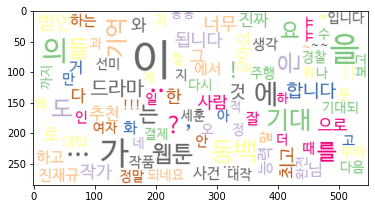

In [2]:
#scroll down
import time
end = time.time() + 60 * 10 #원하는 시간동안 스크롤 내려줌
while time.time() < end:
    try:
        options = driver.find_element(By.CSS_SELECTOR,'div.CommentTab_commentTab__3xKRl > ul > div')
        #options = driver.find_element_by_xpath('//*[@id="root"]/main/div/div/div/div[1]/div[3]/div/div/div[1]/div/div[2]/div/div/div[3]/div/div/div/div/ul/div')
        driver.execute_script("arguments[0].scrollIntoView(true);",options) 
        driver.implicitly_wait(10)
    except: break

#리뷰 크롤링
revList = driver.find_element(By.CLASS_NAME, 'List_list__3e9gw') # review list
i = 0 
BestRev = [] #베스트 리뷰만 따로 저장
wholeRev = []
while True:
    try:
        revCont = revList.find_element(By.XPATH, '//*[@data-index = "{}"]/div/div[2]'.format(i)) #review content
        review = []
        best = revCont.find_element(By.XPATH, 'div[1]/div[1]').text.split('\n')
        bestFlag = 0
        if best[0] == 'BEST': bestFlag = 1
        textRaw = revCont.find_element(By.XPATH, 'div[1]/div[2]')
        textRaw = textRaw.text.split('\n')
        text = []
        for t in textRaw:
            if t != '스포일러가 포함된 댓글 보기': text.append(t)
        review.append(' '.join(text))
        
        episode = revCont.find_element(By.XPATH, 'p').text    
        review.append(episode)
        
        good = revCont.find_element(By.XPATH, 'div[2]/button[1]').text.split(' ')
        if len(good) > 1: review.append(int(good[1].replace(',', '')))
        else: review.append(0)
            
        bad = revCont.find_element(By.XPATH, 'div[2]/button[2]').text.split(' ')
        if len(bad) > 1: review.append(int(bad[1].replace(',', '')))
        else: review.append(0)
        if bestFlag == 1: BestRev.append(review)
        wholeRev.append(review)
        print(review)
        i += 1
    except: break

#comments = [r[0] for r in wholeRev]
 # 좋아요 수만큼 해당 리뷰 반복해서 저장 
comments = []
for r in wholeRev:
    for _ in range(int(r[2]/100) + 1):
        comments.append(r[0])


from konlpy.tag import Okt, Mecab
#분석 밑 워드클라우드 형성, 엑셀 저장
def draw(comments, BestRev,name):
    mec = Okt() #Mecab()# 형태소 분석기 load
    reply_text = [] # 정제된 text
    word_list = [] # 리뷰의 모든 키워드 저장

    for comment in comments:
            reply_text.append(comment) # reply_text에 모두 저장

    sentences_tag = []
    for sentence in reply_text:
        morph = mec.pos(sentence) # 각 문장 형태소 분석(단어 : tag 형태로 저장)
        sentences_tag.append(morph)

    for my_sentence in sentences_tag:
        for word, tag in my_sentence:
            #if tag in ['Noun', 'Adjective']: #명사와 형용사만 추출, 전체 형태소 추출을 위해 주석처리 함
            word_list.append(word) # 원하는 태그의 단어들 word_list에 추가
                
    morpheme = [] # 각 keyword에 해당하는 형태소들을 저장 
    done = []
    for sentence in sentences_tag:
        for s in sentence:
            if s[0] not in done:
                done.append(s[0])
                morpheme.append(s[1])
                
    counts = Counter(word_list)
    count = dict(counts) # 빈도 분석 결과를 dictionary로 만듦
    words = list(count.keys()) # keyword들을 저장 
    freq = list(count.values()) # keyword들의 빈도수를 저장
    
    save = {'Key Words': words, 'Frequency': freq, 'Morph': morpheme} # dictionary로 만들어 dataframe으로 만들기 위함
    df1 = pd.DataFrame.from_dict(save, orient='columns')

    if len(counts) == 0: # 실질적으로 시각화할 단어가 없으면 wordCloud 생성하지 않음
        print('No comments for "{}"'.format(name))
        return

    mask_image = np.array(Image.open('./rect.jpg')) # 사용할 배경 이미지
    wc = WordCloud(
        font_path='./NanumBarunGothic.ttf', # 사용할 폰트 경로
        background_color='white', # 배경색
        max_words=100, # 최대 빈도수를 기준으로 출력할 단어 수
        mask=mask_image, # 마스크 이미지
        max_font_size=70, # 최대 폰트 크기
        colormap='Accent' # 컬러 스타일
    ).generate_from_frequencies(counts)
    print('#############wordcloud for {}#############'.format(name))
    plt.imshow(wc)
    plt.show()
    wc.to_file('./wordcloud_{}.jpg'.format(name))
    br = {'BEST Review': BestRev}
    df2 = pd.DataFrame.from_dict(br, orient='columns')
    with pd.ExcelWriter('./{}.xlsx'.format(name)) as writer:

        df1.to_excel(writer, sheet_name = 'Frequency')

        df2.to_excel(writer, sheet_name = 'Review') 
draw(comments, BestRev, '메모리스트')
#df1 = draw(comments, '멀리서 보면 푸른 봄')




In [ ]:
def draw(comments, BestRev,name):
    mec = Okt() #Mecab()# 형태소 분석기 load
    reply_text = [] # 정제된 text
    word_list = [] # 리뷰의 모든 키워드 저장

    for comment in comments:
            reply_text.append(comment) # reply_text에 모두 저장

    sentences_tag = []
    for sentence in reply_text:
        morph = mec.pos(sentence) # 각 문장 형태소 분석(단어 : tag 형태로 저장)
        sentences_tag.append(morph)

    for my_sentence in sentences_tag:
        for word, tag in my_sentence:
            #if tag in ['Noun', 'Adjective']: #명사와 형용사만 추출, 전체 형태소 추출을 위해 주석처리 함
            word_list.append(word) # 원하는 태그의 단어들 word_list에 추가
                
    morpheme = [] # 각 keyword에 해당하는 형태소들을 저장 
    done = []
    for sentence in sentences_tag:
        for s in sentence:
            if s[0] not in done:
                done.append(s[0])
                morpheme.append(s[1])
                
    counts = Counter(word_list)


    mask_image = np.array(Image.open('./rect.jpg')) # 사용할 배경 이미지
    wc = WordCloud(
        font_path='./NanumBarunGothic.ttf', # 사용할 폰트 경로
        background_color='white', # 배경색
        max_words=100, # 최대 빈도수를 기준으로 출력할 단어 수
        mask=mask_image, # 마스크 이미지
        max_font_size=70, # 최대 폰트 크기
        colormap='Accent' # 컬러 스타일
    ).generate_from_frequencies(counts)
    print('#############wordcloud for {}#############'.format(name))
    plt.imshow(wc)
    plt.show()
    wc.to_file('./wordcloud_{}.jpg'.format(name))
    br = {'BEST Review': BestRev}
    df2 = pd.DataFrame.from_dict(br, orient='columns')
    with pd.ExcelWriter('./{}.xlsx'.format(name)) as writer:

        df1.to_excel(writer, sheet_name = 'Frequency')

        df2.to_excel(writer, sheet_name = 'Review') 
draw(comments, BestRev, '메모리스트')


In [10]:
df = pd.read_excel('./after/ver1_이태원클라쓰.xlsx')
dic = {value['Key Words']: int(value['Frequency']) for i, value in df.iterrows()}


Counter({'로이': 3271,
         '이서': 1857,
         '작가': 1812,
         '결제': 1418,
         '좋아': 675,
         '생각': 659,
         '수아': 649,
         '이라': 607,
         '장가': 556,
         '아버지': 550,
         '돈': 505,
         '근원': 480,
         '드라마': 470,
         '아들': 448,
         '좋은': 436,
         '태원': 415,
         '다음': 414,
         '캐릭': 411,
         '그리': 409,
         '주세요': 395,
         '사랑': 391,
         '인생': 363,
         '회장': 360,
         '클라': 357,
         '전개': 353,
         '박새': 352,
         '멋진': 310,
         '쓰레기': 303,
         '마음': 292,
         '소름': 273,
         '많이': 262,
         '최고': 261,
         '매력': 252,
         '광진': 248,
         '통수': 245,
         '스토': 244,
         '작품': 237,
         '처럼': 234,
         '삶': 232,
         '공감': 231,
         '많은': 224,
         '새끼': 221,
         '감정': 214,
         '항상': 203,
         '같아': 201,
         '형': 200,
         '동생': 200,
         '완결': 195,
         '현실': 193,
         '감사': 

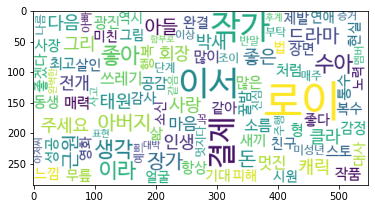

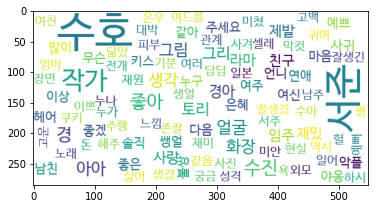

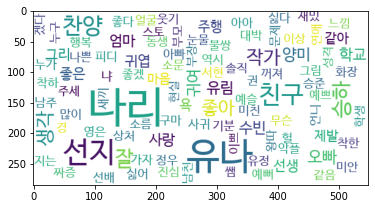

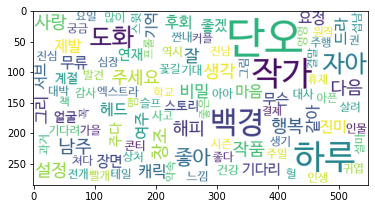

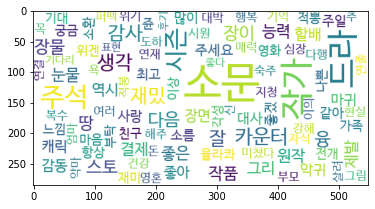

In [19]:
file_list = os.listdir('./after')
file_list = [file for file in file_list if file.endswith(".xlsx")]

for file in file_list:
    df = pd.read_excel('./after/' + file)
    dic = {value['Key Words']: int(value['Frequency']) for i, value in df.iterrows()}
    mask_image = np.array(Image.open('./rect.jpg')) # 사용할 배경 이미지
    wc = WordCloud(
        font_path='./NanumBarunGothic.ttf', # 사용할 폰트 경로
        background_color='white', # 배경색
        max_words=100, # 최대 빈도수를 기준으로 출력할 단어 수
        mask=mask_image, # 마스크 이미지
        max_font_size=70, # 최대 폰트 크기
        #colormap='Accent' # 컬러 스타일
    ).generate_from_frequencies(dic)
    plt.imshow(wc)
    plt.show()
    wc.to_file('./wordcloud_{}.jpg'.format(file[:-5]))